# Airline Passenger Satisfaction Analysis

# 1. Introduction

## Objective
The goal of this project is to analyze factors influencing airline passenger satisfaction using exploratory data analysis (EDA). The key objectives are:
1. Investigate demographic and travel-related patterns.
2. Explore the impact of service satisfaction ratings on overall satisfaction.
3. Assess how flight delays (departure and arrival) affect passenger satisfaction.
4. Identify insights that can help airlines improve customer satisfaction.

This project demonstrates skills in:
- **Data Wrangling**: Cleaning and preprocessing data.
- **Visualization**: Using Seaborn and Matplotlib to uncover patterns.
- **Insights Discovery**: Identifying actionable insights from the data.

## Key Results
The analysis revealed:
- **Majority Satisfaction Levels**: Most passengers who selected "Neutral or Dissatisfied" belonged to the **Economy Class**.
- **Top Correlating Services**: In Economy Class, the top three service features with the highest correlation to overall satisfaction are:
  1. **Inflight Wi-Fi Service**: Correlation = 0.63
  2. **Online Boarding**: Correlation = 0.43
  3. **Ease of Online Booking**: Correlation = 0.32

These insights suggest that improving specific services like inflight Wi-Fi, online boarding, and booking systems could significantly enhance customer satisfaction in the Economy Class.

## Dataset Overview
This dataset contains approximately 26,000 entries with the following features:
- **Demographic Information**: Gender, Age, and Customer Type.
- **Travel Information**: Type of Travel, Class, Flight Distance.
- **Satisfaction**: Labels ("Satisfied" or "Neutral or Dissatisfied").
- **Service Ratings**: 14 satisfaction metrics on a 5-point scale.
- **Delays**: Departure and arrival delays in minutes.

## Tools and Libraries
The analysis leverages:
- **Python**: For data manipulation and analysis.
- **Pandas & NumPy**: For data processing and statistical exploration.
- **Matplotlib & Seaborn**: For creating insightful visualizations.

---

## Import Library, Set Parameter

In [2]:
# Importing essential libraries for data analysis and visualization

# pandas: For data manipulation and analysis
import pandas as pd

# numpy: For numerical operations and handling arrays
import numpy as np

# matplotlib: For creating static visualizations
import matplotlib.pyplot as plt

# seaborn: For advanced data visualization (built on top of matplotlib)
import seaborn as sns

# Setting a style for seaborn visualizations to enhances readability of plots
sns.set_style("whitegrid")  

# 2. Data Loading and Inspection

This section focuses on loading the dataset and performing an initial inspection to understand its structure, quality, and key characteristics. The steps include:
1. Loading the dataset.
2. Inspecting the structure and basic details of the dataset.
3. Summarizing the statistical properties of numeric features.
4. Checking for missing values.
5. Identifying duplicate rows.

---


## 2.1 Loading the Dataset

We begin by loading the dataset into a pandas DataFrame and displaying the first few rows to confirm successful import.

In [3]:
# Importing the dataset for analysis
# The dataset is downloaded from Kaggle: 
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
# Using 'test.csv' for this project

# Loading the dataset into a pandas DataFrame
air = pd.read_csv("Airline_Passenger_Satisfaction.csv", index_col=0)  # 'index_col=0' sets the first column as the index

# Displaying the first few rows to confirm successful import
air.head()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 2.2 Dataset Structure

This step provides an overview of the dataset, including the number of rows and columns, column names, and data types.

In [9]:
# Inspecting the dataset structure
# Checking the number of rows and columns
print(f"Dataset contains {air.shape[0]} rows and {air.shape[1]} columns.",'\n')

# Displaying column names and data types
air.info()


Dataset contains 25976 rows and 24 columns. 

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drin

## 2.3 Statistical Summary

We calculate basic descriptive statistics for numerical columns to understand the data distribution and identify potential anomalies.

In [5]:
# Displaying basic statistical details for numerical columns
air.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


## 2.4 Missing Values

Missing data can affect the analysis and model performance. Here, we identify columns with missing values and their counts.

In [6]:
# Checking for missing values in the dataset
missing_data = air.isnull().sum()

# Display columns with missing values (if any)
missing_data = missing_data[missing_data > 0]
if not missing_data.empty:
    print("Columns with missing values:")
    print(missing_data)
else:
    print("No missing values in the dataset.")

Columns with missing values:
Arrival Delay in Minutes    83
dtype: int64


## 2.5 Duplicate Rows

Duplicate rows can introduce bias into the analysis. We check for and count duplicate rows in the dataset.

In [7]:
# Checking for duplicate rows in the dataset
duplicates = air.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# Rewrite up to here

In [25]:
# drop null value
air = air.dropna()

In [28]:
air.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
air.dtypes.query()

In [39]:
air.dtypes[air.dtypes == 'object'].index

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [54]:
pd.DataFrame([[1],['1'],[1.00]]).value_counts()

0
1    2
1    1
Name: count, dtype: int64

In [40]:
air['Gender'].value_counts()

Gender
Female    13127
Male      12766
Name: count, dtype: int64

In [12]:
# check the data type of object is all string.
air.dtypes.where(air.dtypes == 'object')

for col_name in air.dtypes[air.dtypes == 'object'].index.to_list():
  print(air[[col_name]][air[col_name].apply(lambda x: isinstance(x, str))].count() == air[[col_name]].count(), end='\n\n')

Gender    True
dtype: bool

Customer Type    True
dtype: bool

Type of Travel    True
dtype: bool

Class    True
dtype: bool

satisfaction    True
dtype: bool



In [58]:
# Unselect rows with "0" value in those 5-point scale.
air_clean = air[air.loc[:,"Inflight wifi service":"Cleanliness"].all(axis=1)]
air_clean

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## Univariate Analysis

In [60]:
color_palette = {
    'Gender': {'Male': '#1f77b4', 'Female': '#ff7f0e'},                # Blue, Orange
    'Customer Type': {'Loyal Customer': '#9467bd', 'disloyal Customer': '#8c564b'},     # Purple, Brown
    'Type of Travel': {'Business travel': '#ffcc00', 'Personal Travel': '#4daf4a'}, # Yellow, Green-Teal
    'Class': {'Eco': '#17becf', 'Eco Plus': '#bcbd22', 'Business': '#e377c2'}, # Teal, Olive, Pink
    'satisfaction': {'satisfied': 'green', 'neutral or dissatisfied': 'red'},  # Green, Red
    'Age': sns.color_palette("coolwarm", as_cmap=True),               # Coolwarm gradient for Age
    'Flight Distance': sns.color_palette("viridis", as_cmap=True),    # Viridis gradient for Flight Distance
    'Scales': sns.color_palette("Blues", 5),                          # For 5-point scales
    'Delays': sns.color_palette("YlOrRd", as_cmap=True),              # Gradient for delays
}

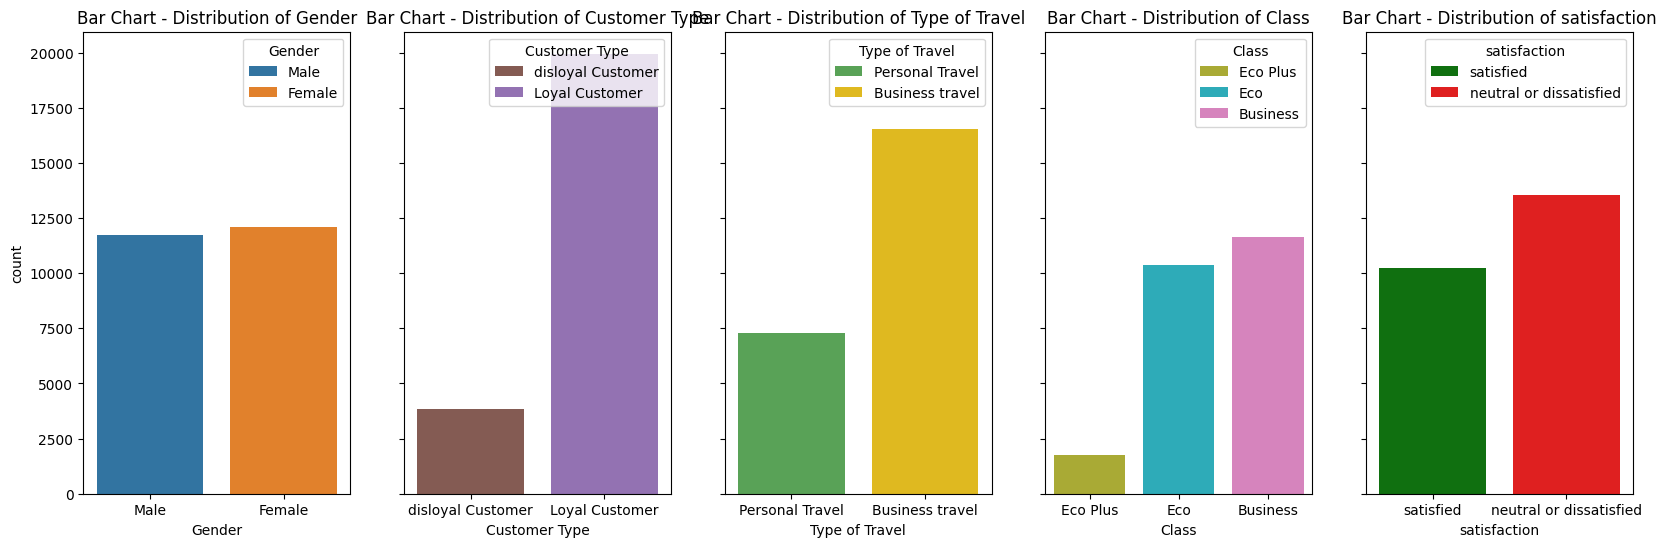

In [99]:
fig, ax = plt.subplots(1,5, sharey=True, figsize=(20,6))
for i, col in enumerate(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']):
    sns.countplot(air_clean.sort_values(col,ascending=False),
                  x=col, hue=col,
                  palette=color_palette[col],
                  legend=True, ax=ax[i]).set_title(f"Bar Chart - Distribution of {air[col].name}")

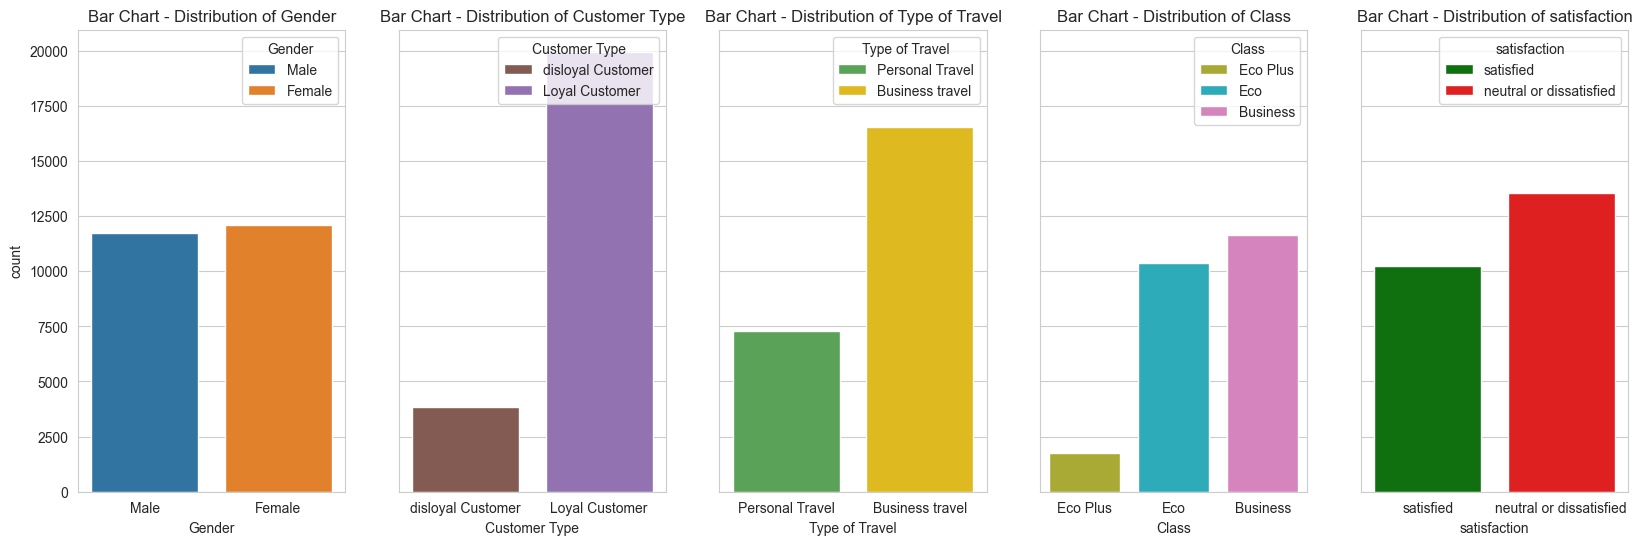

In [61]:
fig, ax = plt.subplots(1,5, sharey=True, figsize=(20,6))
for i, col in enumerate(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']):
    sns.countplot(air_clean.sort_values(col,ascending=False),
                  x=col, hue=col,
                  palette=color_palette[col],
                  legend=True, ax=ax[i]).set_title(f"Bar Chart - Distribution of {air[col].name}")

In [63]:
# Define a custom function to format the labels
def pct_value_func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)'

def pie_chart_para(data):
    counting_series = data.value_counts().sort_values()
    labels = counting_series.index
    return {"x": counting_series, 
            "autopct" : lambda pct: pct_value_func(pct, counting_series),
            "startangle": 90,
            "colors": [color_palette[labels.name][label] for label in labels]}

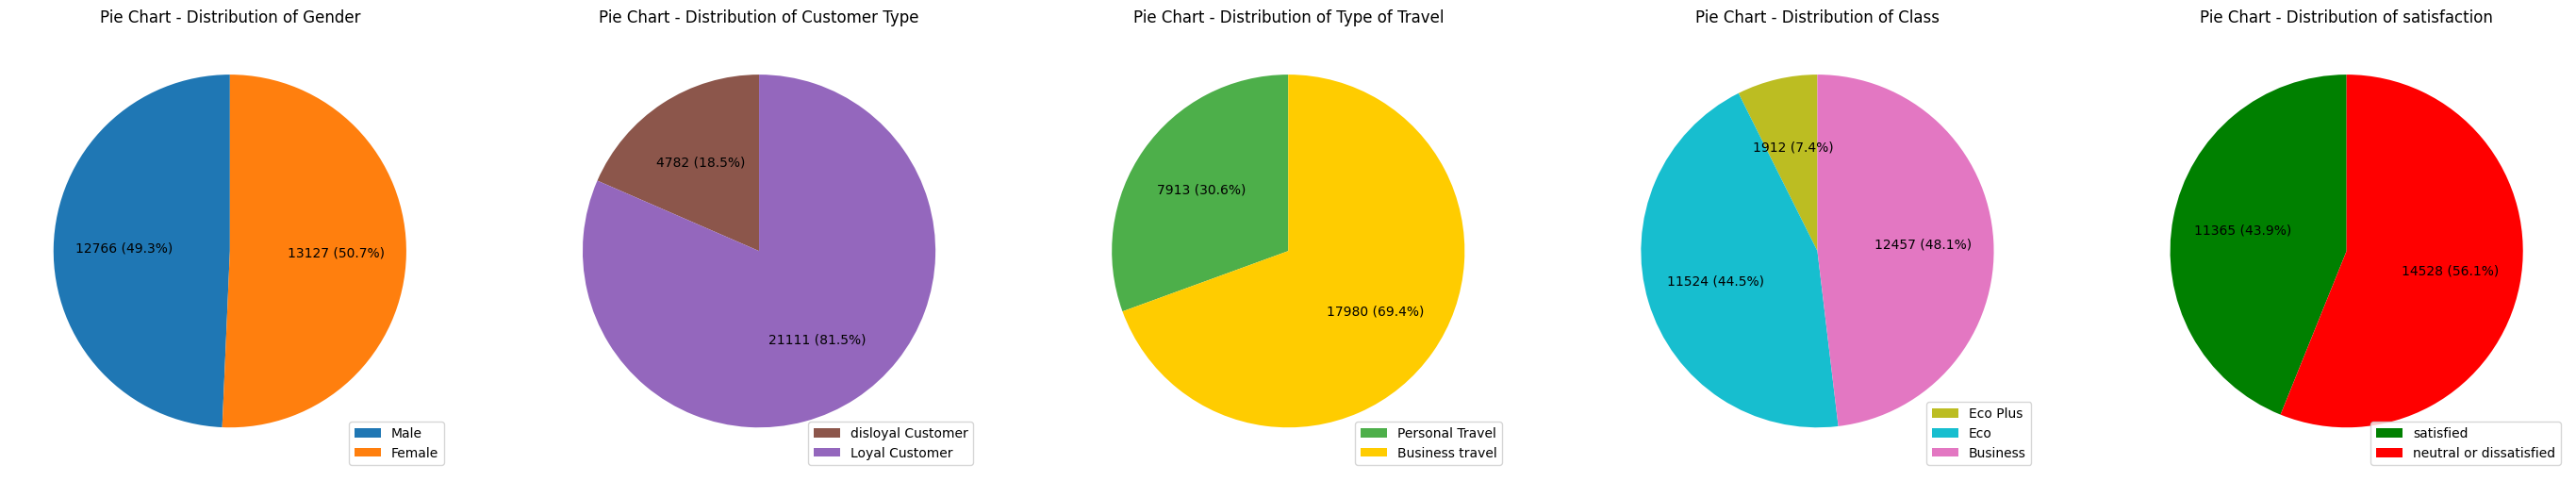

In [97]:
fig, ax = plt.subplots(1,5, sharey=True, figsize=(35,7))
for i, col in enumerate(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']):
    ax[i].pie(**pie_chart_para(air[col]))
    # ax[i].axis('equal')
    ax[i].set_title(f"Pie Chart - Distribution of {air[col].name}")
    ax[i].legend(labels=air[col].value_counts().sort_values().index,loc='lower right')

Text(0.5, 1.0, 'Histogram - Distribution of Age')

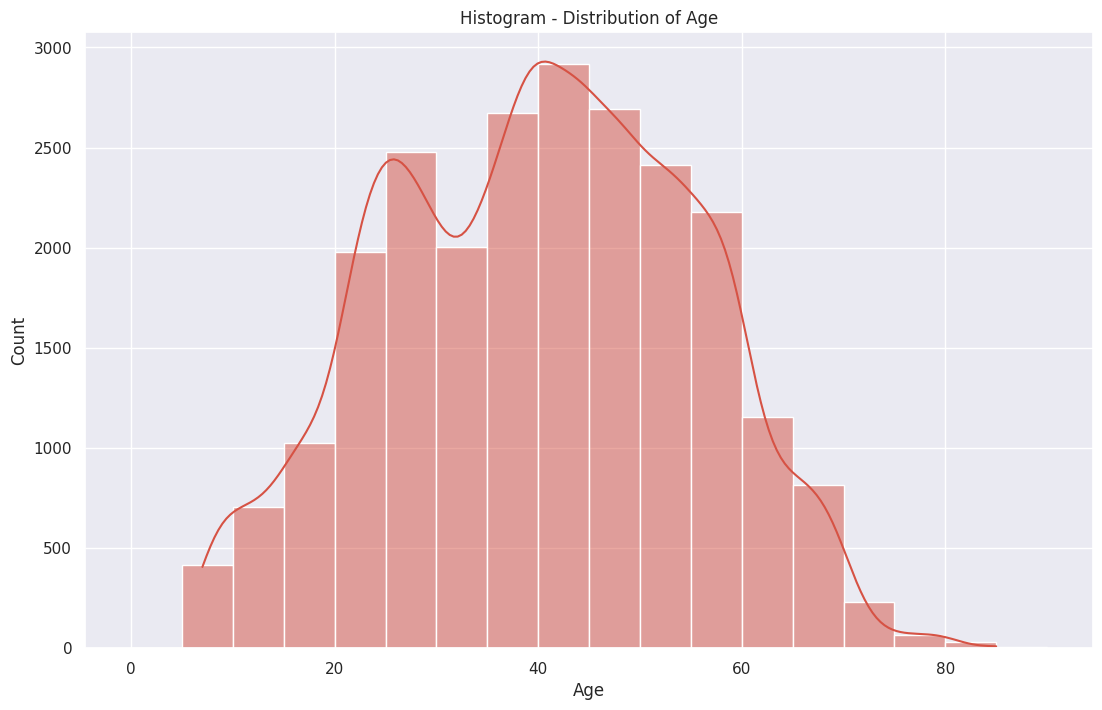

In [57]:
sns.histplot(air_clean.Age, kde = True, binwidth= 5, binrange=[0,90], color=color_palette['Age'](0.9))
# Title
plt.title('Histogram - Distribution of Age')

Text(0.5, 1.0, 'Histogram - Distribution of Flight Distance')

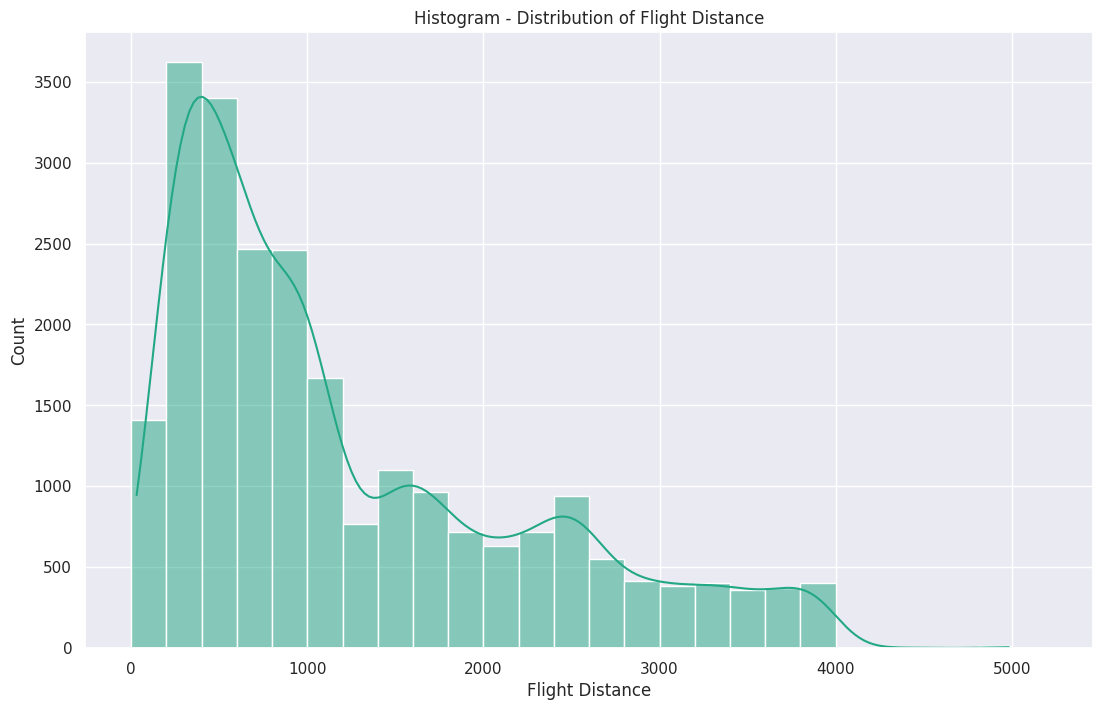

In [61]:
sns.histplot(air_clean["Flight Distance"], kde = True, binwidth=200, binrange=[0,5200], color=color_palette['Flight Distance'](0.6))
# Title
plt.title('Histogram - Distribution of Flight Distance')

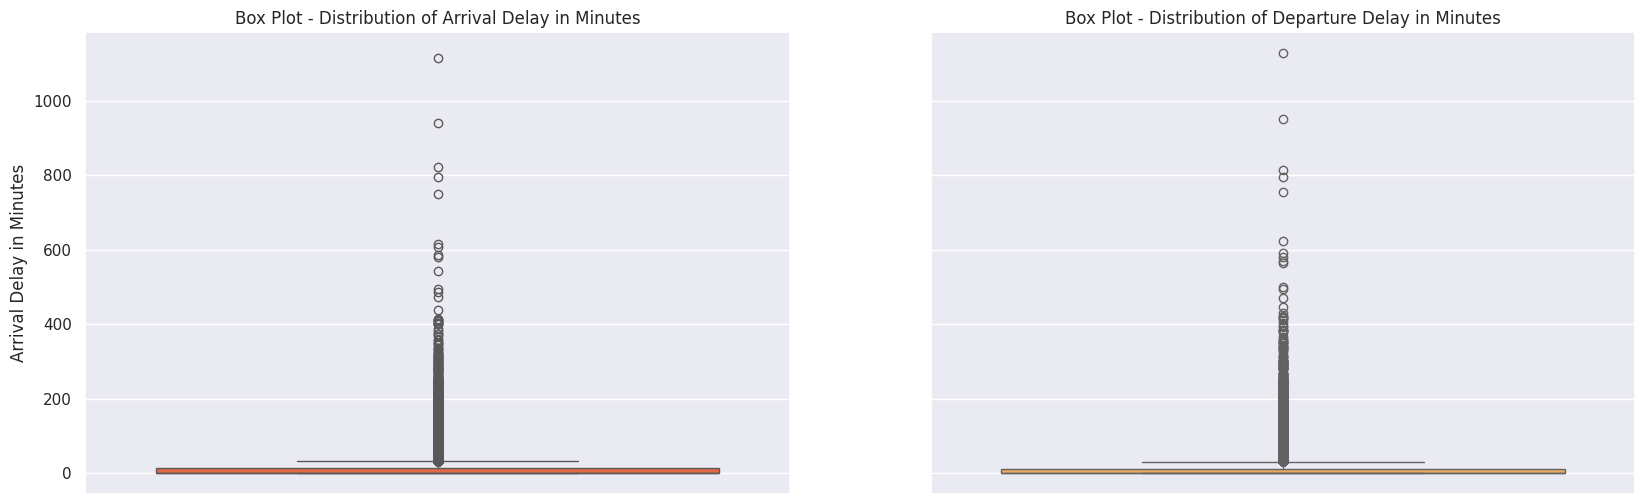

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
sns.boxplot(air_clean, y='Arrival Delay in Minutes', color=color_palette['Delays'](0.6), ax=ax[0])
# Title
ax[0].title.set_text('Box Plot - Distribution of Arrival Delay in Minutes')

sns.boxplot(air_clean, y='Departure Delay in Minutes', color=color_palette['Delays'](0.4), ax=ax[1])
# Title
ax[1].title.set_text('Box Plot - Distribution of Departure Delay in Minutes')

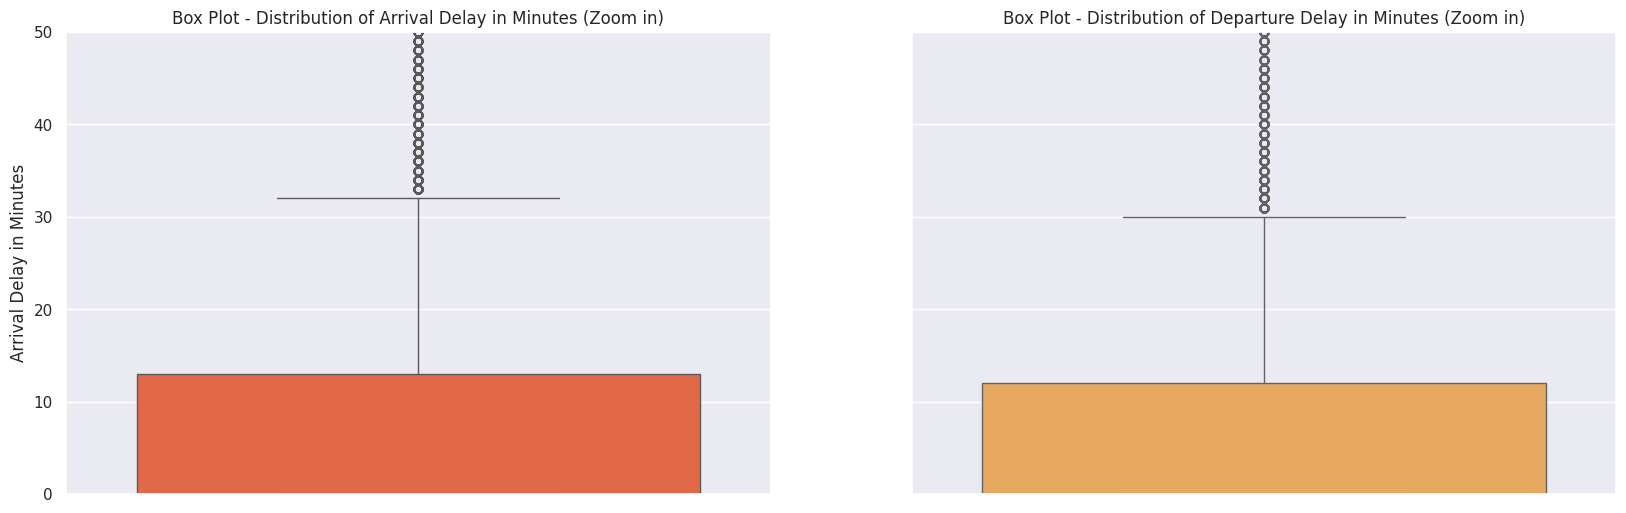

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
plt.ylim(0,50)
sns.boxplot(air_clean, y='Arrival Delay in Minutes', color=color_palette['Delays'](0.6), ax=ax[0])
# Title
ax[0].title.set_text('Box Plot - Distribution of Arrival Delay in Minutes (Zoom in)')

sns.boxplot(air_clean, y='Departure Delay in Minutes', color=color_palette['Delays'](0.4), ax=ax[1])
# Title
ax[1].title.set_text('Box Plot - Distribution of Departure Delay in Minutes (Zoom in)')

Text(0.5, 1.0, 'Box Plot of satisfaction_score of 14 fields (5 point scale)')

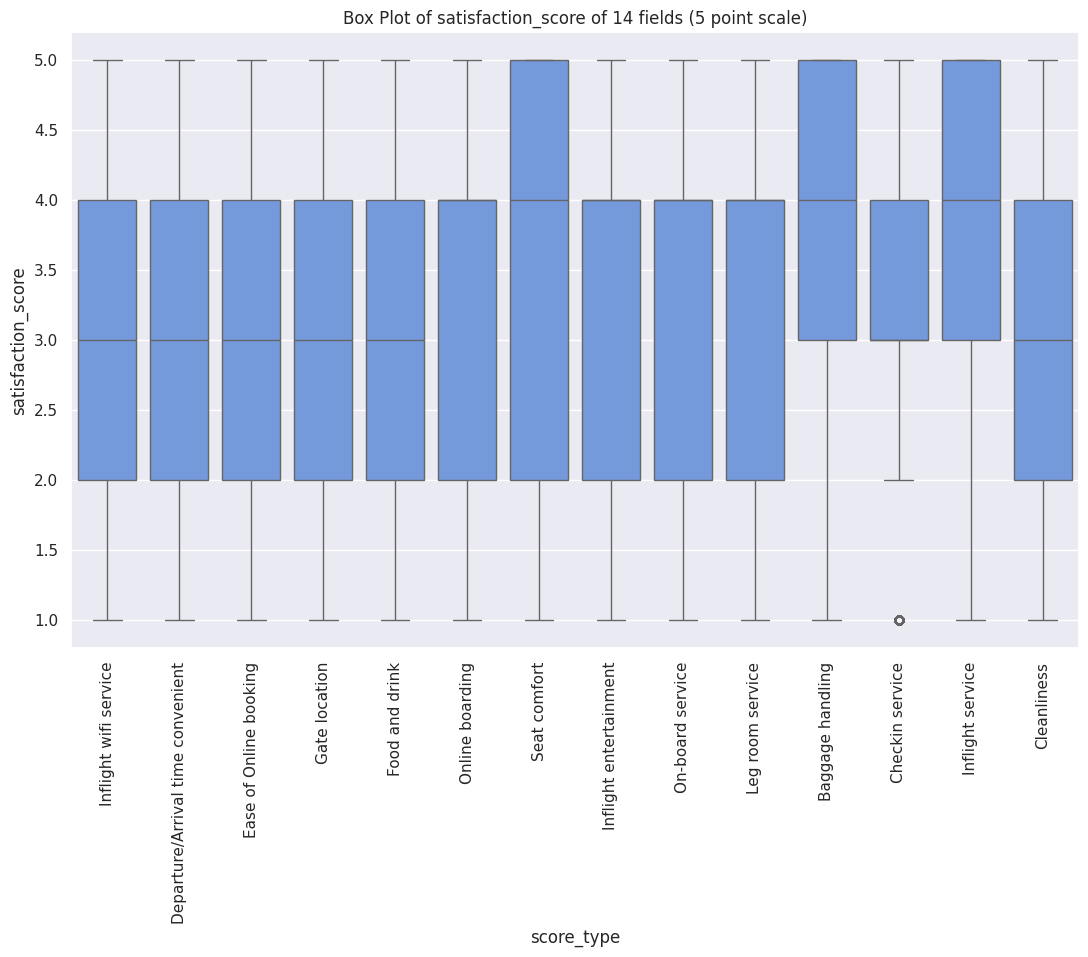

In [64]:
# Conduct a box plot in revealing each category in the dataset.

air_clean_box = air_clean[air_clean.loc[:,'Inflight wifi service':'Cleanliness'].columns.to_list()+['satisfaction']]

air_clean_box_melted = air_clean_box.melt(id_vars='satisfaction',
                    value_vars=air_clean_box.columns.to_list()[:-1],
                    var_name='score_type',
                    value_name='satisfaction_score')

sns.boxplot(air_clean_box_melted, x='score_type', y='satisfaction_score', color='cornflowerblue')
plt.xticks(rotation=90)
plt.title("Box Plot of satisfaction_score of 14 fields (5 point scale)")

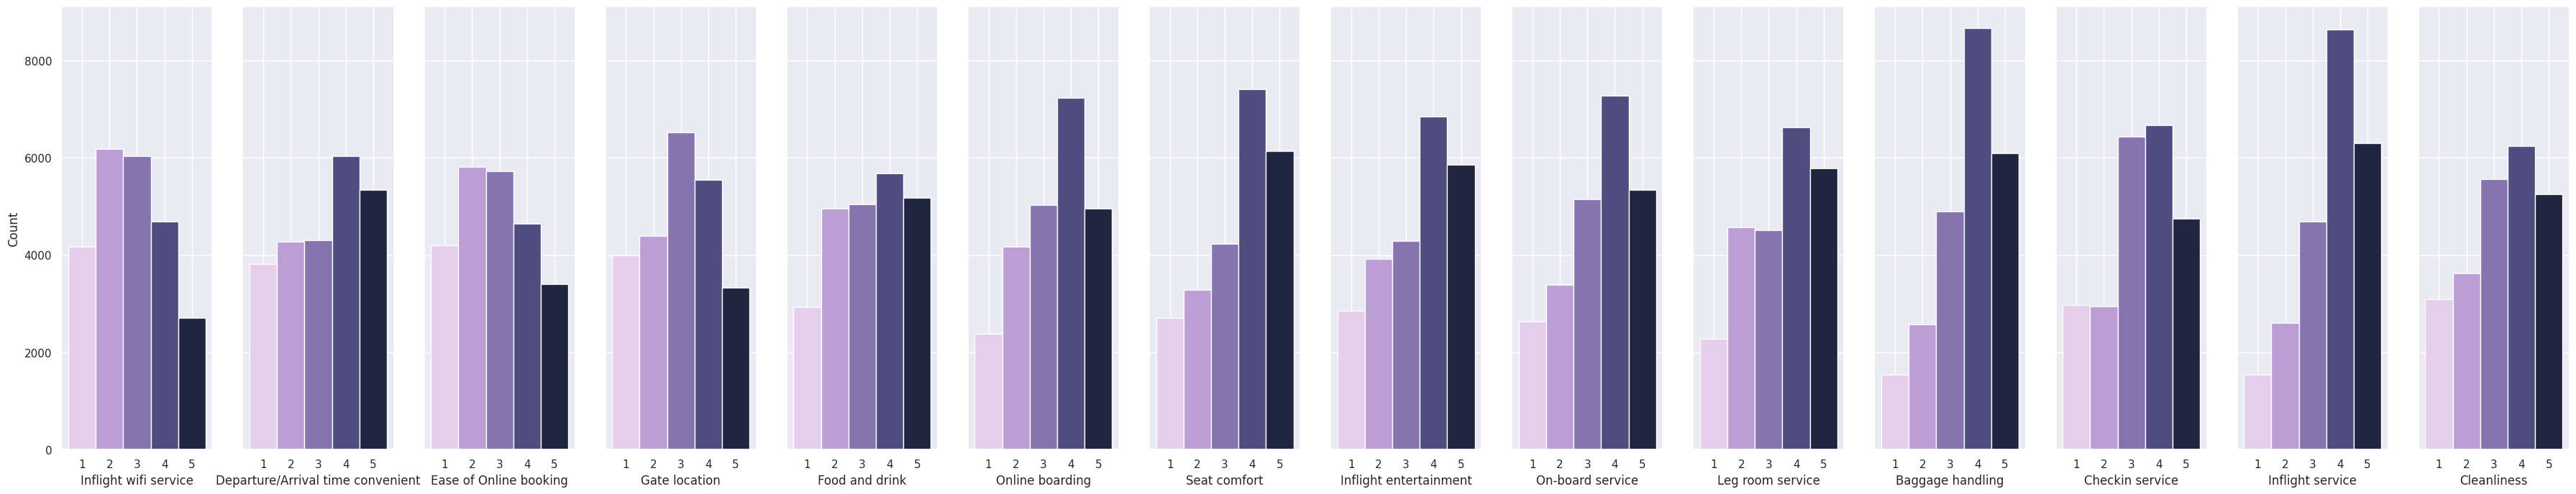

In [65]:
fig, ax = plt.subplots(1,14, figsize=(45,8), sharey=True)

colors = sns.color_palette("ch:s=-.2,r=.2", n_colors=5)

for i, column in enumerate(air_clean.loc[:,'Inflight wifi service':'Cleanliness'].columns):
    sns.histplot(air_clean[column], bins=np.arange(0.5, 6.5, 1), kde=False, ax=ax[i])
    ax[i].set_xticks(ticks=range(1, 6), labels=range(1, 6))

    patches = ax[i].patches

    for i, patch in enumerate(patches):
        patch.set_facecolor(colors[i])

([<matplotlib.patches.Wedge at 0x7b17eee70e80>,
 [Text(-1.0737212710792976, 0.23900341426820218, 'satisfied'),
  Text(1.0737212710792974, -0.2390034142682028, 'neutral or dissatisfied')],
 [Text(-0.585666147861435, 0.13036549869174663, '10235 (43.0%)'),
  Text(0.5856661478614349, -0.13036549869174696, '13553 (57.0%)')])

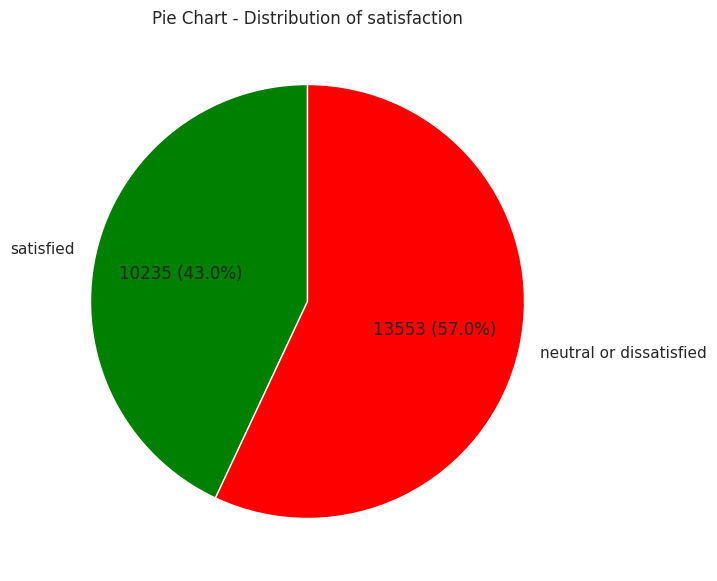

In [66]:
#satisfaction counts and proportion in pie chart.

pie_chart(air_clean['satisfaction'], colors=[color_palette['satisfaction']['satisfied'],color_palette['satisfaction']['neutral or dissatisfied']])

## Bivariate Analysis

<ipython-input-67-289872c9cff6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(air_clean,


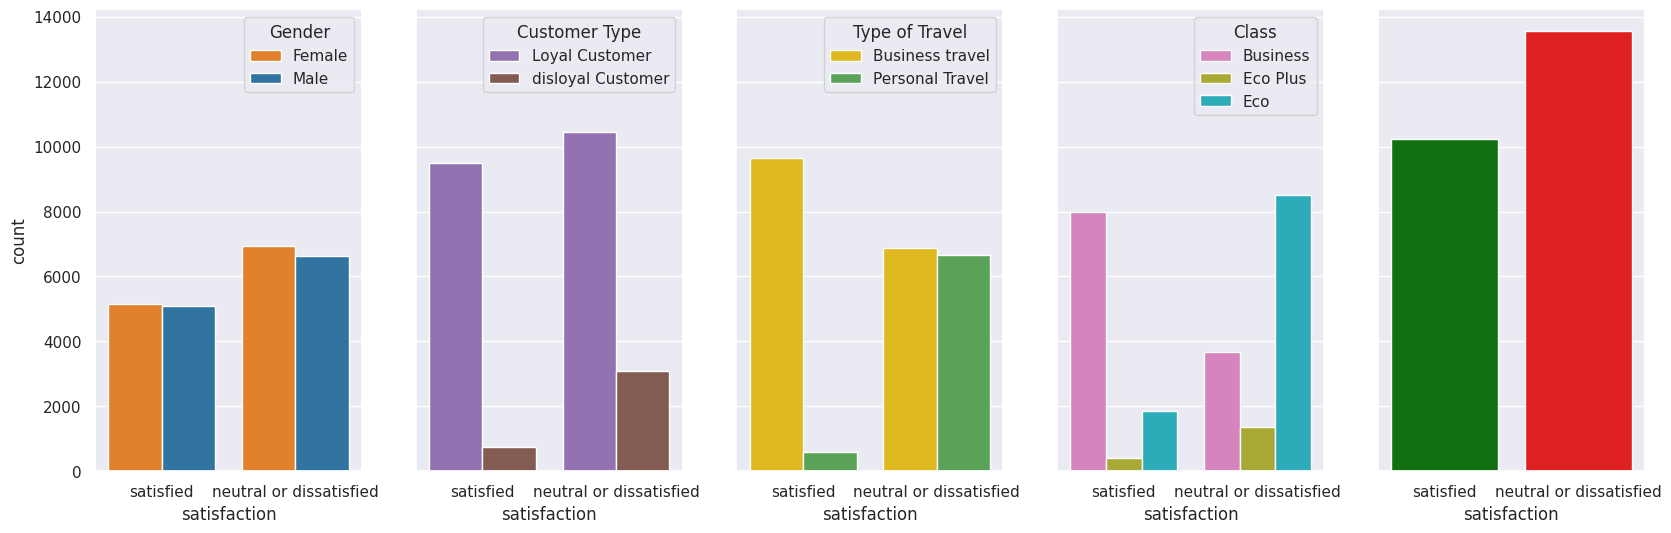

In [67]:
# Try to understand travellers' satisfaction level with different categorical variables.
# Discover that a majority of Eco class travellers have a negative experience. So we decided to dig through it.

air_att = air_clean[['Gender', 'Customer Type', 'Age', 'Type of Travel','Class', 'Flight Distance']]
col_name_cat = air_clean[['Gender', 'Customer Type', 'Type of Travel','Class']].columns

n = len(col_name_cat)
fig, ax = plt.subplots(1, n + 1, sharey=True, figsize=(20,6))

for i in range(n+1):
  sns.countplot(air_clean,
                x='satisfaction',
                hue=col_name_cat[i] if i < n else None,
                # stat="percent",
                hue_order=(['Business', 'Eco Plus', 'Eco'] if col_name_cat[i] == 'Class' else None) if i < n else None,
                # palette = None if i < n else [sns.color_palette()[8],sns.color_palette()[9]],
                palette = color_palette[col_name_cat[i] if i < n else 'satisfaction'],
                ax=ax[i])

<Axes: xlabel='Age', ylabel='Count'>

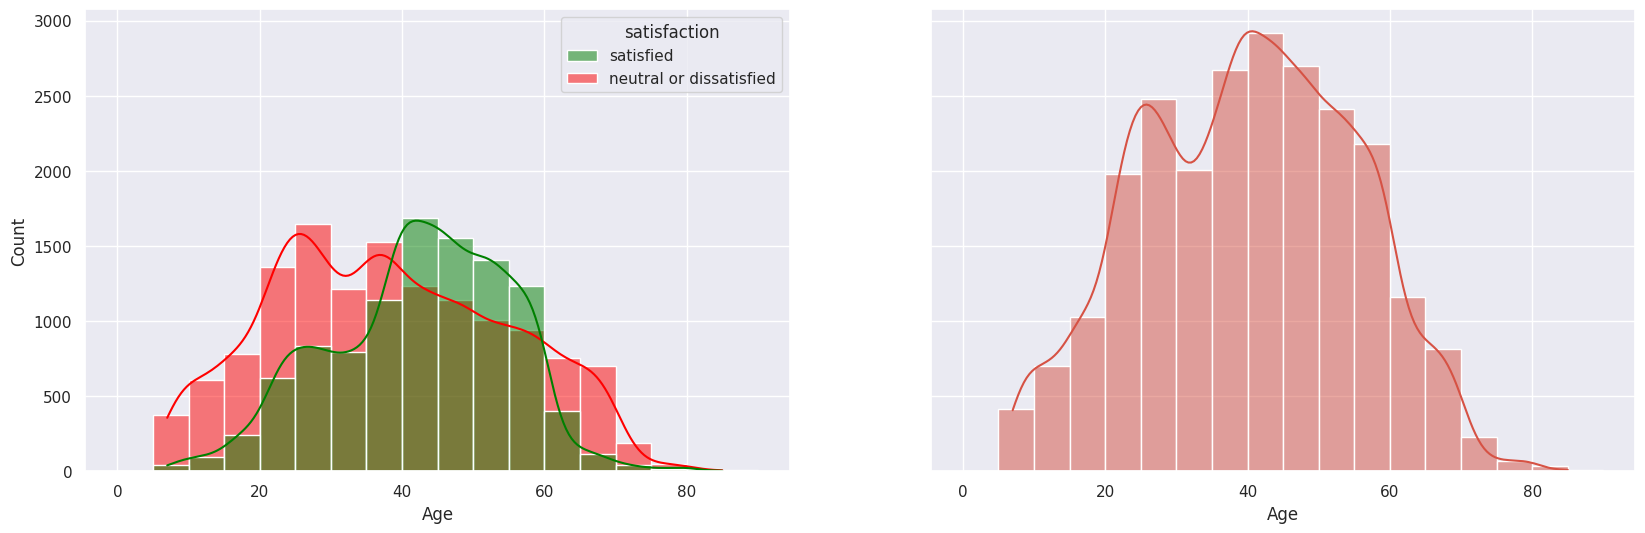

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
sns.histplot(air_clean, x='Age', hue='satisfaction', kde=True, binwidth= 5, binrange=[0,90], palette=color_palette['satisfaction'],ax=ax[0])
sns.histplot(air_clean, x='Age', kde=True, binwidth= 5, binrange=[0,90], color=color_palette['Age'](0.9), ax=ax[1])

<Axes: xlabel='Flight Distance', ylabel='Count'>

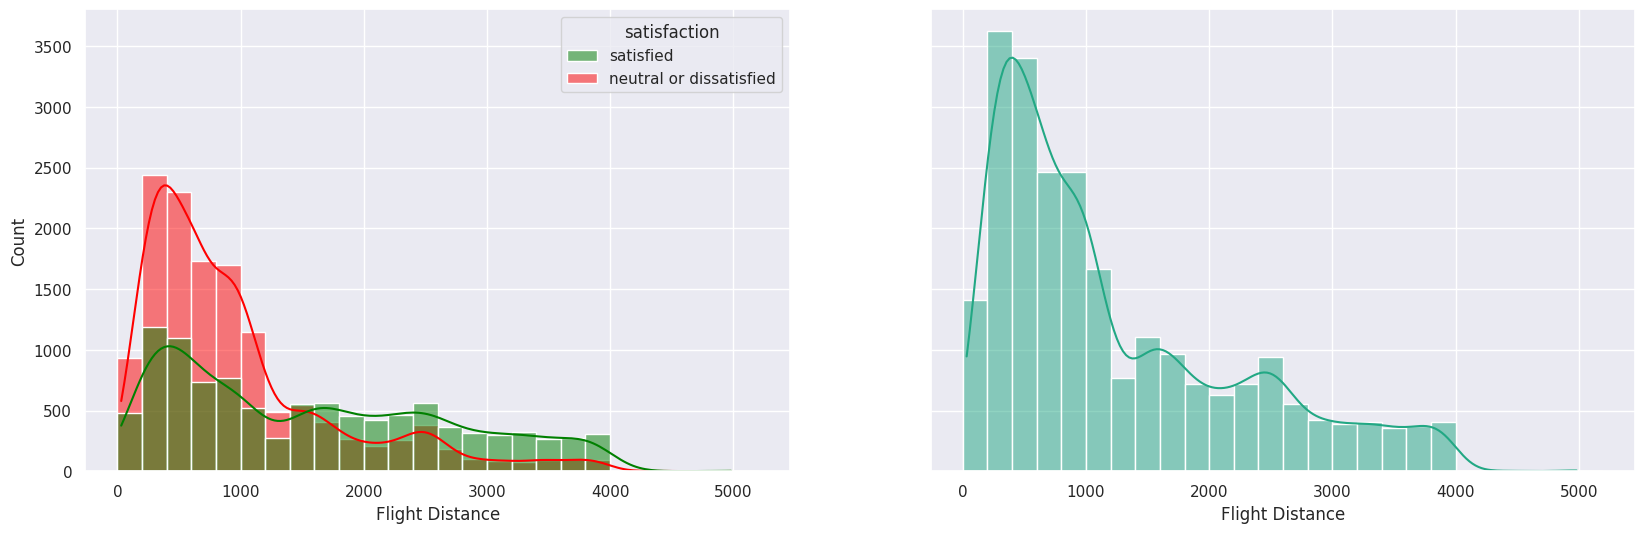

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
sns.histplot(air_clean, x='Flight Distance', hue='satisfaction', kde=True, binwidth=200, binrange=[0,5200], palette=color_palette['satisfaction'],ax=ax[0])
sns.histplot(air_clean, x='Flight Distance', kde=True, binwidth=200, binrange=[0,5200], color=color_palette['Flight Distance'](0.6), ax=ax[1])

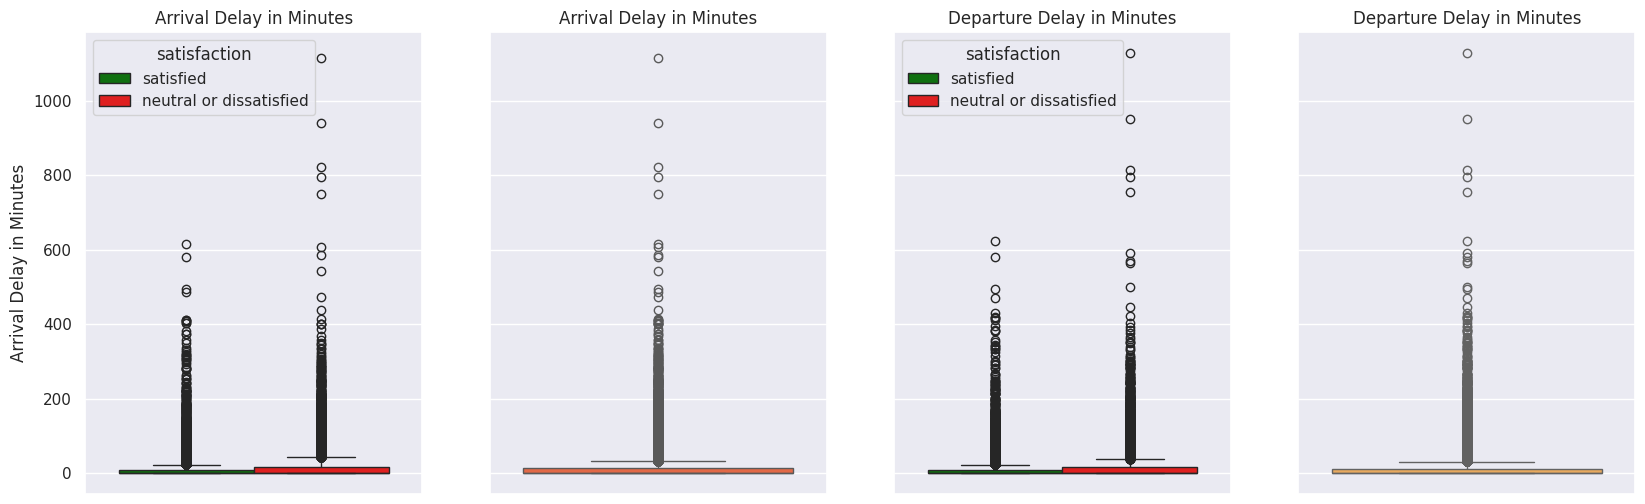

In [70]:
fig, ax = plt.subplots(1, 4, figsize=(20,6), sharey=True)

sns.boxplot(air_clean, y='Arrival Delay in Minutes', hue='satisfaction',  palette=color_palette['satisfaction'], ax=ax[0])
# Title
ax[0].title.set_text('Arrival Delay in Minutes')

sns.boxplot(air_clean, y='Arrival Delay in Minutes',  color=color_palette['Delays'](0.6), ax=ax[1])
# Title
ax[1].title.set_text('Arrival Delay in Minutes')

sns.boxplot(air_clean, y='Departure Delay in Minutes', hue='satisfaction',  palette=color_palette['satisfaction'], ax=ax[2])
# Title
ax[2].title.set_text('Departure Delay in Minutes')
sns.boxplot(air_clean, y='Departure Delay in Minutes',  color=color_palette['Delays'](0.4), ax=ax[3])
# Title
ax[3].title.set_text('Departure Delay in Minutes')

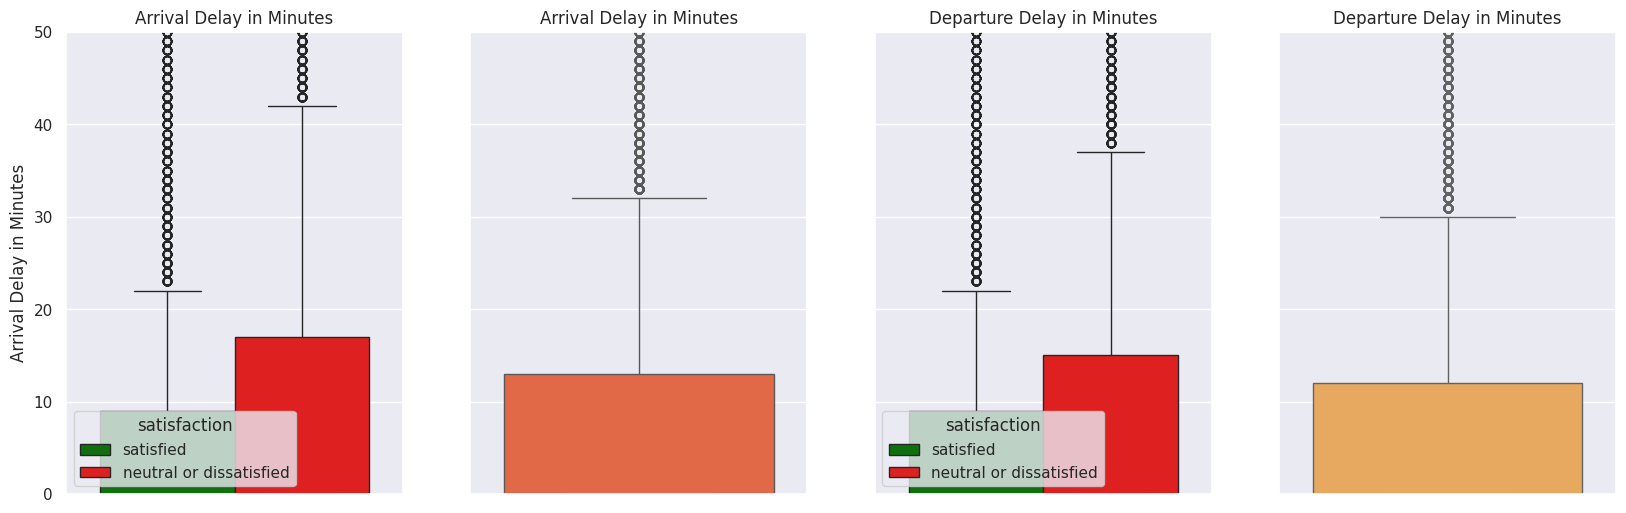

In [71]:
fig, ax = plt.subplots(1, 4, figsize=(20,6), sharey=True)
plt.ylim(0,50)
sns.boxplot(air_clean, y='Arrival Delay in Minutes', hue='satisfaction',  palette=color_palette['satisfaction'], ax=ax[0])
# Title
ax[0].title.set_text('Arrival Delay in Minutes')

sns.boxplot(air_clean, y='Arrival Delay in Minutes',  color=color_palette['Delays'](0.6), ax=ax[1])
# Title
ax[1].title.set_text('Arrival Delay in Minutes')

sns.boxplot(air_clean, y='Departure Delay in Minutes', hue='satisfaction',  palette=color_palette['satisfaction'], ax=ax[2])
# Title
ax[2].title.set_text('Departure Delay in Minutes')
sns.boxplot(air_clean, y='Departure Delay in Minutes',  color=color_palette['Delays'](0.4), ax=ax[3])
# Title
ax[3].title.set_text('Departure Delay in Minutes')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Inflight wifi service'),
  Text(1, 0, 'Departure/Arrival time convenient'),
  Text(2, 0, 'Ease of Online booking'),
  Text(3, 0, 'Gate location'),
  Text(4, 0, 'Food and drink'),
  Text(5, 0, 'Online boarding'),
  Text(6, 0, 'Seat comfort'),
  Text(7, 0, 'Inflight entertainment'),
  Text(8, 0, 'On-board service'),
  Text(9, 0, 'Leg room service'),
  Text(10, 0, 'Baggage handling'),
  Text(11, 0, 'Checkin service'),
  Text(12, 0, 'Inflight service'),
  Text(13, 0, 'Cleanliness')])

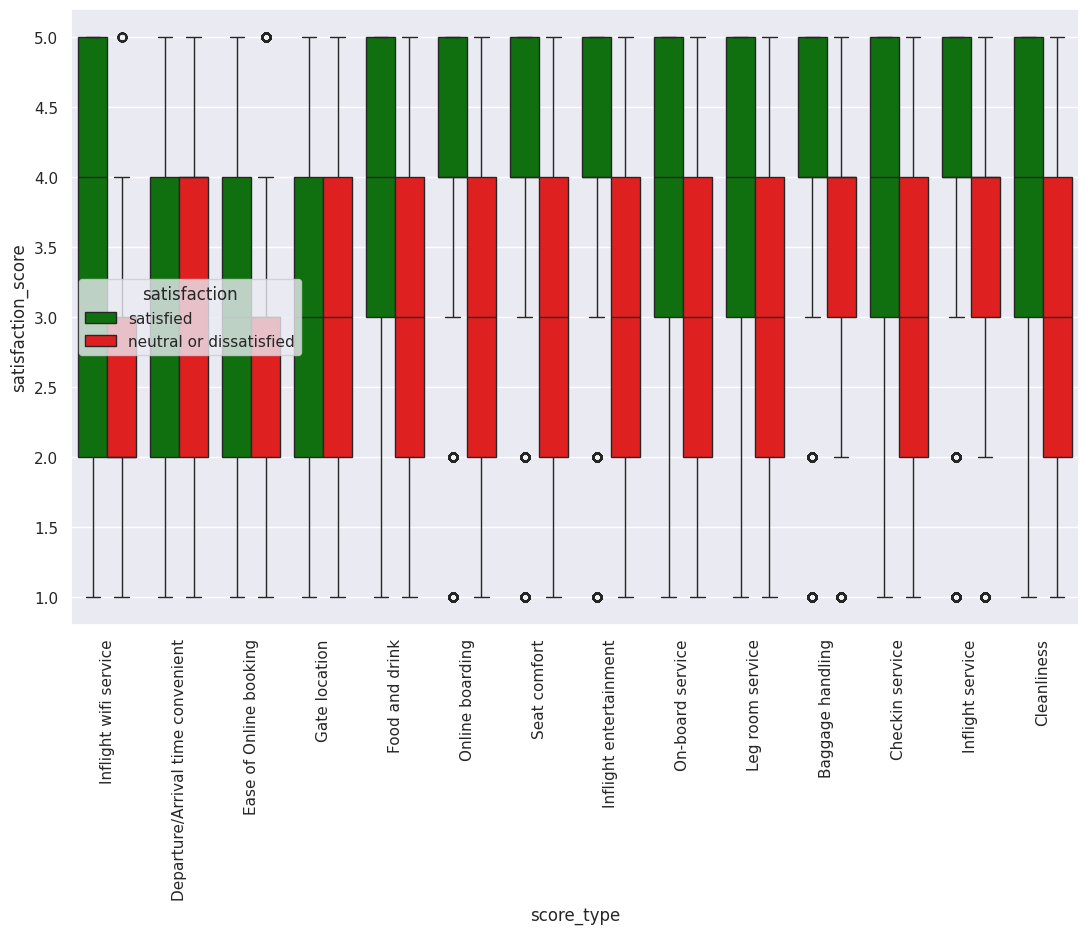

In [72]:
# Conduct a box plot in revealing each category in the dataset.

air_clean_box = air_clean[air_clean.loc[:,'Inflight wifi service':'Cleanliness'].columns.to_list()+['satisfaction']]

air_clean_box_melted = air_clean_box.melt(id_vars='satisfaction',
                    value_vars=air_clean_box.columns.to_list()[:-1],
                    var_name='score_type',
                    value_name='satisfaction_score')

sns.boxplot(air_clean_box_melted, x='score_type', y='satisfaction_score', hue='satisfaction', palette=color_palette['satisfaction'])
plt.xticks(rotation=90)

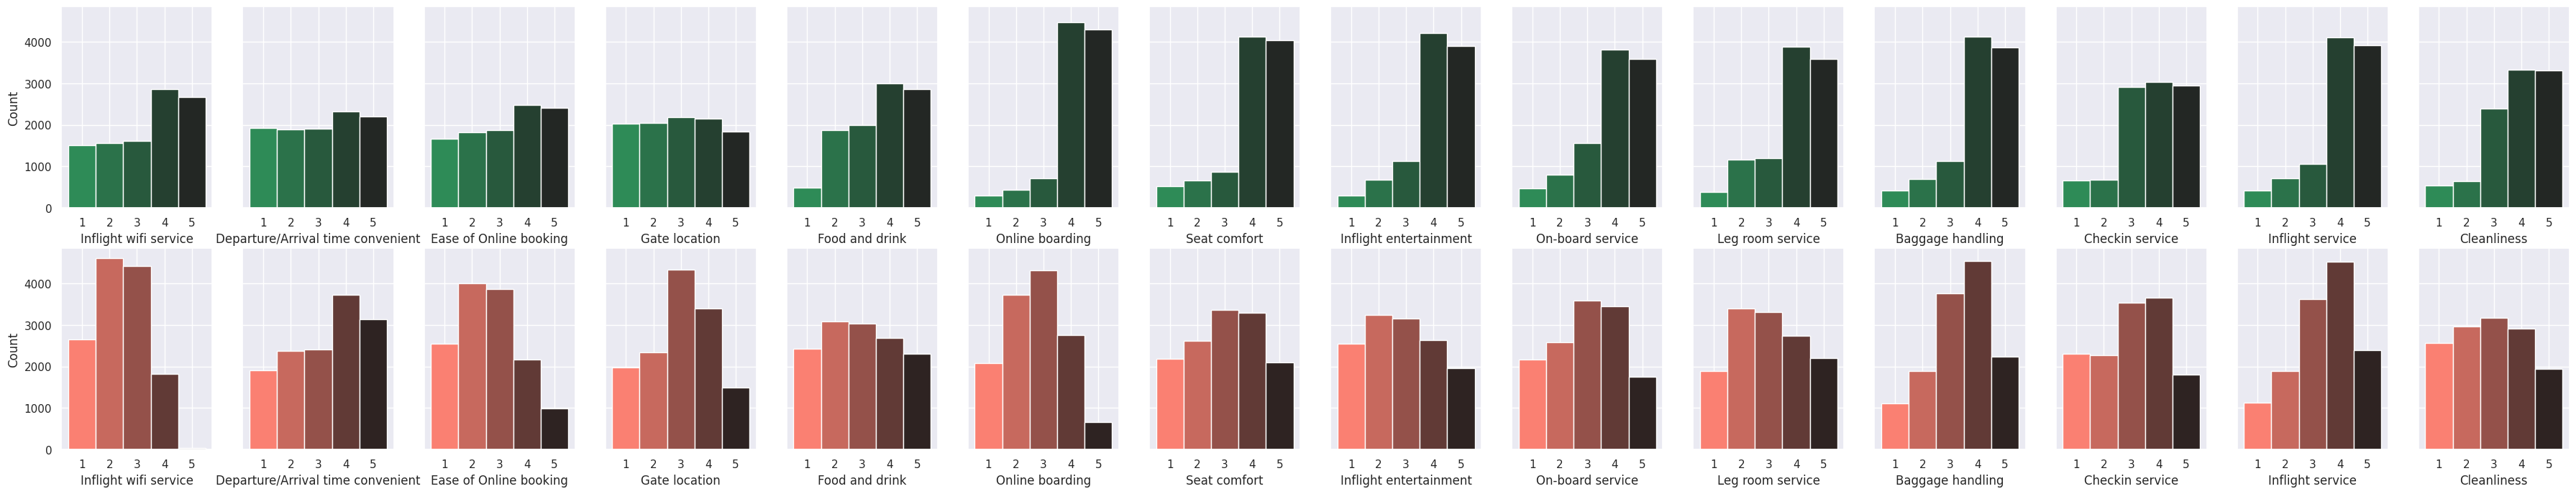

In [73]:
fig, ax = plt.subplots(2, 14, figsize=(45,8), sharey=True)
colors_satisfied = sns.color_palette("dark:seagreen_r", n_colors=5)
colors_dissatisfied = sns.color_palette("dark:salmon_r", n_colors=5)


for i, column in enumerate(air_clean.loc[:,'Inflight wifi service':'Cleanliness'].columns):
    sns.histplot(air_clean[air_clean['satisfaction']=='satisfied'], x=column, bins=np.arange(0.5, 6.5, 1), kde=False, ax=ax[0,i])
    sns.histplot(air_clean[air_clean['satisfaction']!='satisfied'], x=column, bins=np.arange(0.5, 6.5, 1), kde=False, ax=ax[1,i])
    ax[0,i].set_xticks(ticks=range(1, 6), labels=range(1, 6))
    ax[1,i].set_xticks(ticks=range(1, 6), labels=range(1, 6))

    patches = ax[0,i].patches
    for j, patch in enumerate(patches):
        patch.set_facecolor(colors_satisfied[j])

    patches = ax[1,i].patches
    for k, patch in enumerate(patches):
        patch.set_facecolor(colors_dissatisfied[k])

## Futher Bivariate Analysis - Eco Focus

In [74]:
# 10356 rows of record available records for our following study.
air_clean_eco_count = air_clean[air_clean["Class"] == "Eco"].count()
air_clean_eco_count

,0
Gender,10356
Customer Type,10356
Age,10356
Type of Travel,10356
Class,10356
Flight Distance,10356
Inflight wifi service,10356
Departure/Arrival time convenient,10356
Ease of Online booking,10356
Gate location,10356


In [75]:
air_clean_eco = air_clean[air_clean["Class"] == "Eco"]
air_clean_eco

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
10,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,1,1,...,3,3,4,3,1,3,4,29,19.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25966,Male,disloyal Customer,42,Business travel,Eco,1024,4,4,4,2,...,3,3,1,2,2,3,3,0,17.0,neutral or dissatisfied
25968,Male,Loyal Customer,41,Business travel,Eco,692,2,2,2,2,...,2,2,3,3,2,3,2,15,3.0,neutral or dissatisfied
25970,Female,disloyal Customer,36,Business travel,Eco,432,1,5,1,3,...,4,5,2,5,2,3,4,0,0.0,neutral or dissatisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied


Plot graph and counting results in below cells:
Biveriate variables in "air_clean_eco" sub-dataset~

<ipython-input-76-f819d9e1d56c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(air_clean_eco, x='satisfaction', palette=color_palette['satisfaction'], ax=ax[3])


<Axes: xlabel='satisfaction', ylabel='count'>

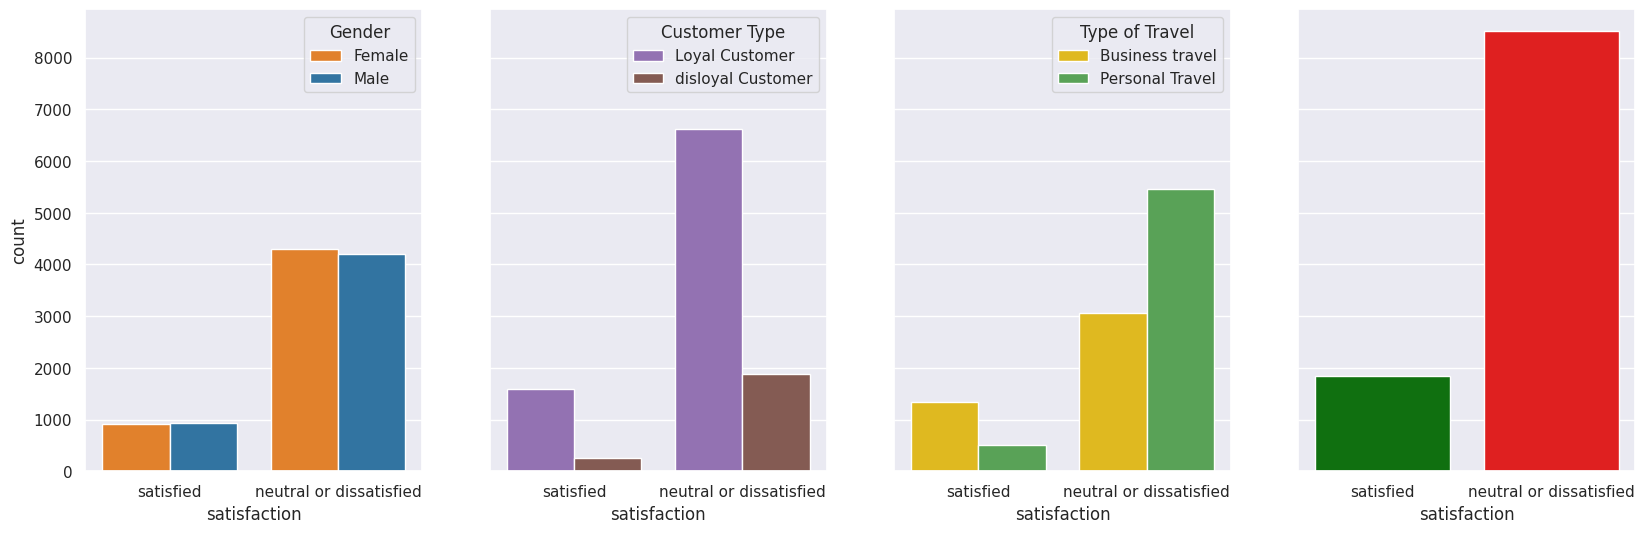

In [76]:
# Compare the satisfaction data with different categorical variables respectively,
# discovered that there are no obvious difference detween each categorical variable and satisfaction(except Travel Type).
fig, ax = plt.subplots(1,4, sharey=True, figsize=(20,6))
sns.countplot(air_clean_eco, x='satisfaction', hue='Gender', palette=color_palette['Gender'], ax=ax[0])
sns.countplot(air_clean_eco, x='satisfaction', hue='Customer Type', palette=color_palette['Customer Type'], ax=ax[1])
sns.countplot(air_clean_eco, x='satisfaction', hue='Type of Travel',  palette=color_palette['Type of Travel'], ax=ax[2])
sns.countplot(air_clean_eco, x='satisfaction', palette=color_palette['satisfaction'], ax=ax[3])

# We discovered that the proportion of the satisified - neutral or dissatisified is different from others table.
# A majority of travellers with Personal type were not satisfied with the services provided. We can further take a look later.

<Axes: xlabel='Age', ylabel='Count'>

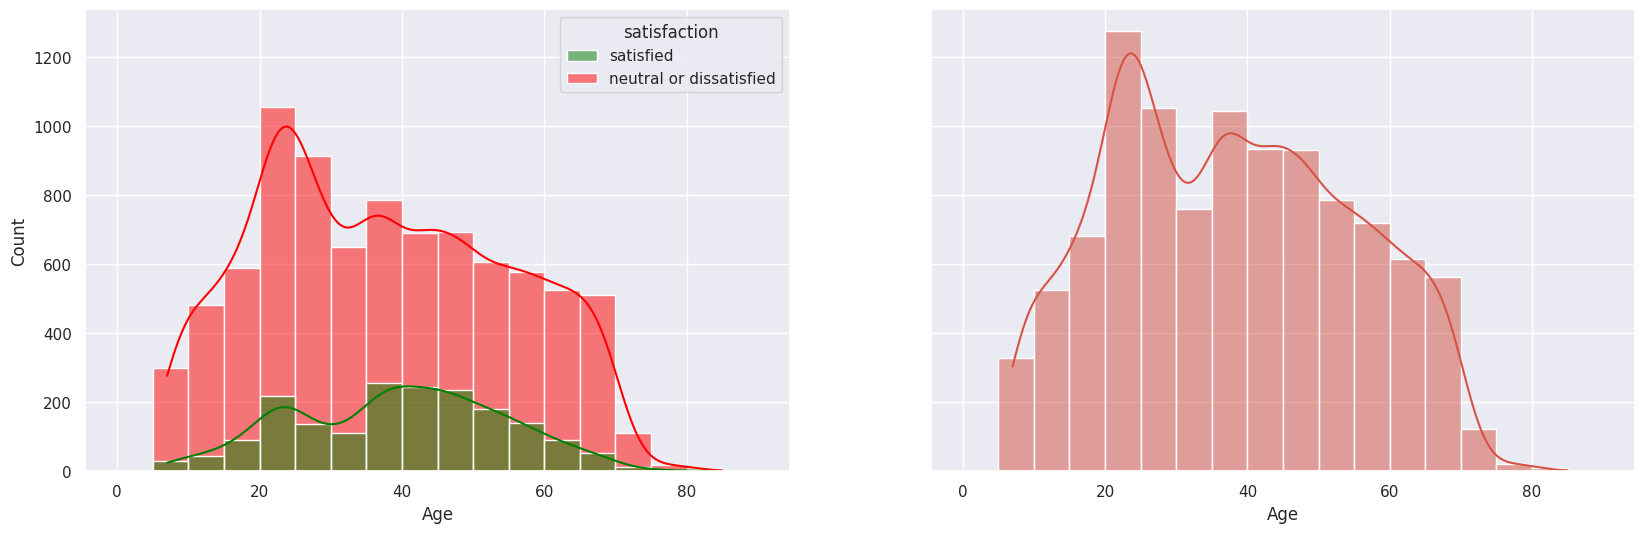

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
sns.histplot(air_clean_eco, x='Age', hue='satisfaction', kde=True, binwidth= 5, binrange=[0,90], palette=color_palette['satisfaction'],ax=ax[0])
sns.histplot(air_clean_eco, x='Age', kde=True, binwidth= 5, binrange=[0,90], color=color_palette['Age'](0.9), ax=ax[1])

<Axes: xlabel='Flight Distance', ylabel='Count'>

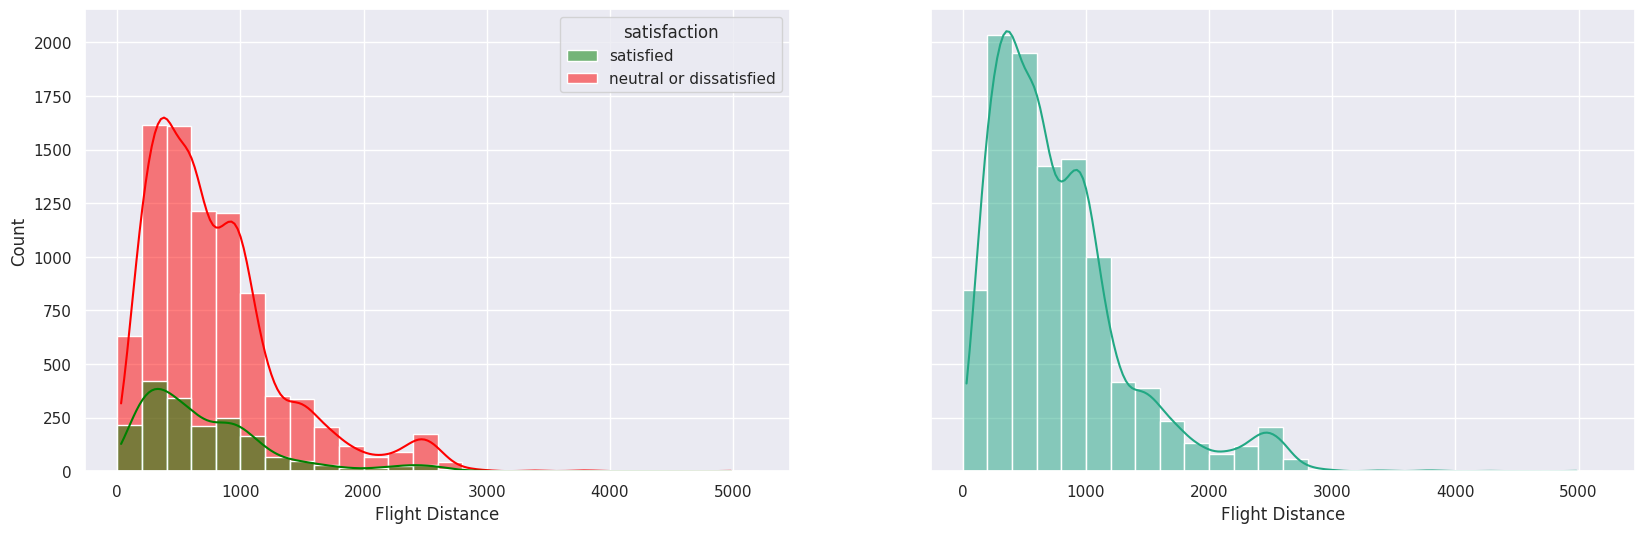

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
sns.histplot(air_clean_eco, x='Flight Distance', hue='satisfaction', kde=True, binwidth=200, binrange=[0,5200], palette=color_palette['satisfaction'],ax=ax[0])
sns.histplot(air_clean_eco, x='Flight Distance', kde=True, binwidth=200, binrange=[0,5200], color=color_palette['Flight Distance'](0.6), ax=ax[1])

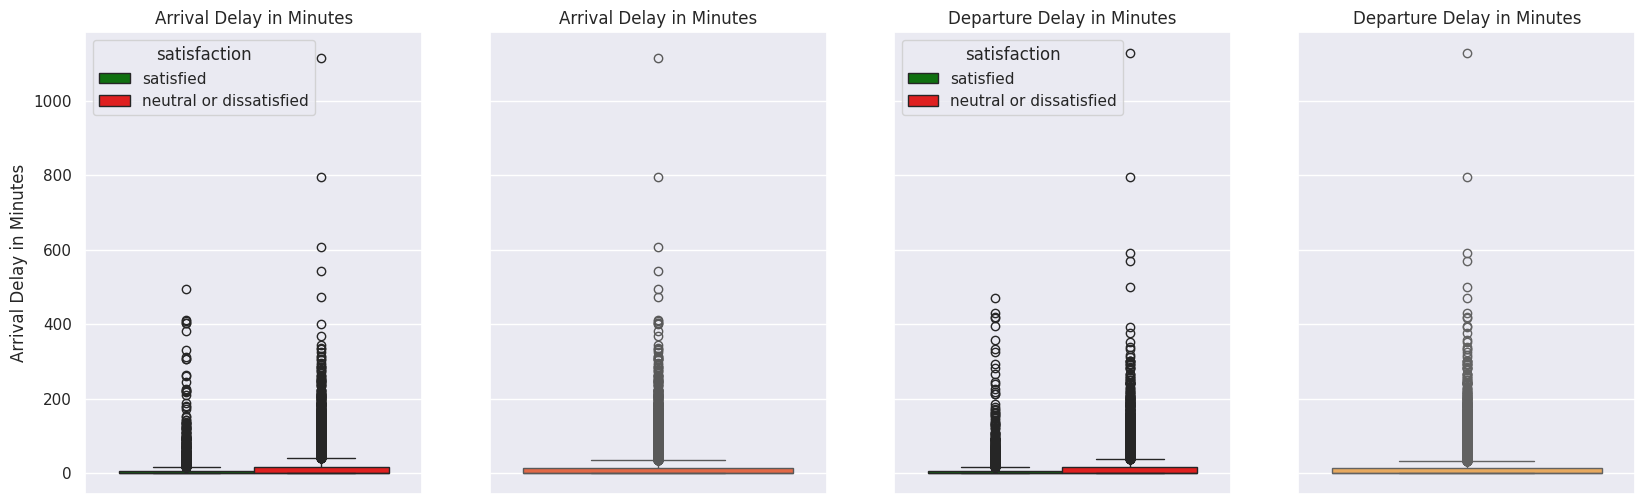

In [79]:
fig, ax = plt.subplots(1, 4, figsize=(20,6), sharey=True)

sns.boxplot(air_clean_eco, y='Arrival Delay in Minutes', hue='satisfaction',  palette=color_palette['satisfaction'], ax=ax[0])
# Title
ax[0].title.set_text('Arrival Delay in Minutes')

sns.boxplot(air_clean_eco, y='Arrival Delay in Minutes',  color=color_palette['Delays'](0.6), ax=ax[1])
# Title
ax[1].title.set_text('Arrival Delay in Minutes')

sns.boxplot(air_clean_eco, y='Departure Delay in Minutes', hue='satisfaction',  palette=color_palette['satisfaction'], ax=ax[2])
# Title
ax[2].title.set_text('Departure Delay in Minutes')
sns.boxplot(air_clean_eco, y='Departure Delay in Minutes',  color=color_palette['Delays'](0.4), ax=ax[3])
# Title
ax[3].title.set_text('Departure Delay in Minutes')

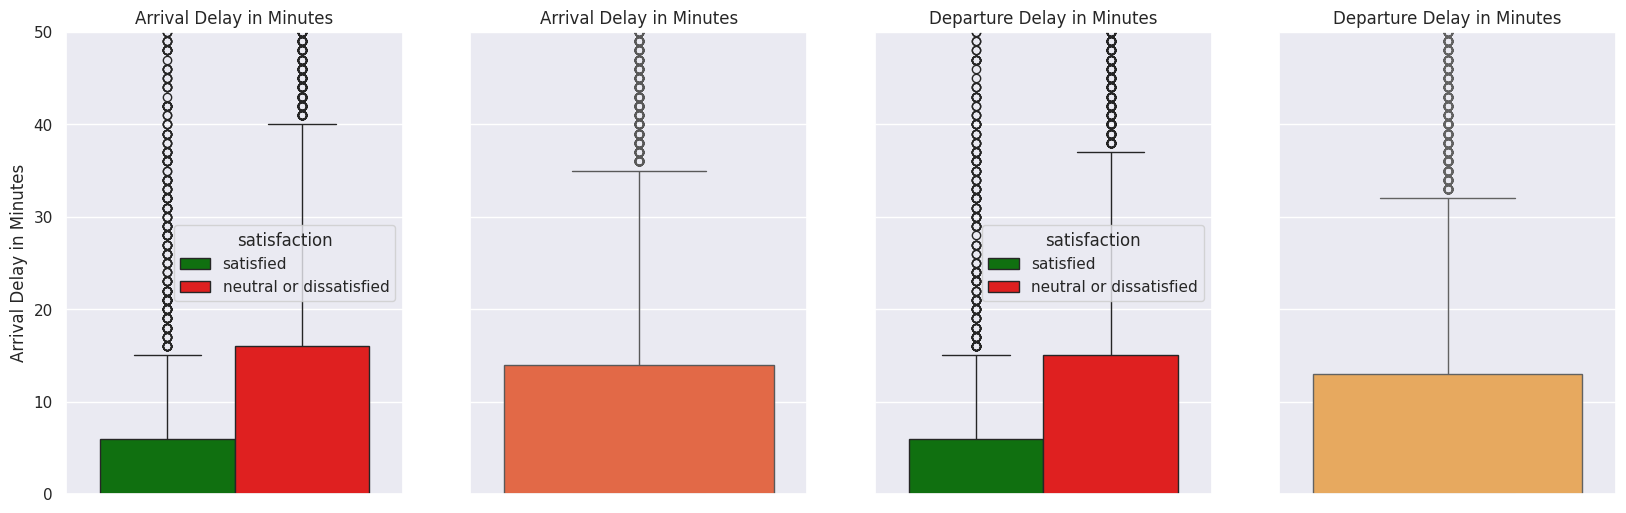

In [80]:
fig, ax = plt.subplots(1, 4, figsize=(20,6), sharey=True)
plt.ylim(0,50)
sns.boxplot(air_clean_eco, y='Arrival Delay in Minutes', hue='satisfaction',  palette=color_palette['satisfaction'], ax=ax[0])
# Title
ax[0].title.set_text('Arrival Delay in Minutes')

sns.boxplot(air_clean_eco, y='Arrival Delay in Minutes',  color=color_palette['Delays'](0.6), ax=ax[1])
# Title
ax[1].title.set_text('Arrival Delay in Minutes')

sns.boxplot(air_clean_eco, y='Departure Delay in Minutes', hue='satisfaction',  palette=color_palette['satisfaction'], ax=ax[2])
# Title
ax[2].title.set_text('Departure Delay in Minutes')
sns.boxplot(air_clean_eco, y='Departure Delay in Minutes',  color=color_palette['Delays'](0.4), ax=ax[3])
# Title
ax[3].title.set_text('Departure Delay in Minutes')

In [81]:
# Statistic value for "Eco" sub-dataset.

#There are total 4 variables with mean<3 (5 point scale)

# Ease of Online booking 2.71
# Inflight wifi service 2.74
# Online boarding 2.93
# Gate Location 2.98

air_clean[air_clean["Class"] == "Eco"].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000
mean,37.787273,776.168019,2.735709,3.371186,2.714658,2.978660,3.083913,2.925840,3.154114,3.081016,3.101390,3.092893,3.445539,3.119834,3.469486,3.081402,15.021051,15.681827
std,16.882181,557.170173,1.174065,1.357390,1.211876,1.179672,1.371789,1.236303,1.369109,1.376250,1.302286,1.321100,1.171539,1.302165,1.191932,1.367922,38.810134,39.112884
min,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,370.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,37.000000,641.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1009.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,14.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Inflight wifi service'),
  Text(1, 0, 'Departure/Arrival time convenient'),
  Text(2, 0, 'Ease of Online booking'),
  Text(3, 0, 'Gate location'),
  Text(4, 0, 'Food and drink'),
  Text(5, 0, 'Online boarding'),
  Text(6, 0, 'Seat comfort'),
  Text(7, 0, 'Inflight entertainment'),
  Text(8, 0, 'On-board service'),
  Text(9, 0, 'Leg room service'),
  Text(10, 0, 'Baggage handling'),
  Text(11, 0, 'Checkin service'),
  Text(12, 0, 'Inflight service'),
  Text(13, 0, 'Cleanliness')])

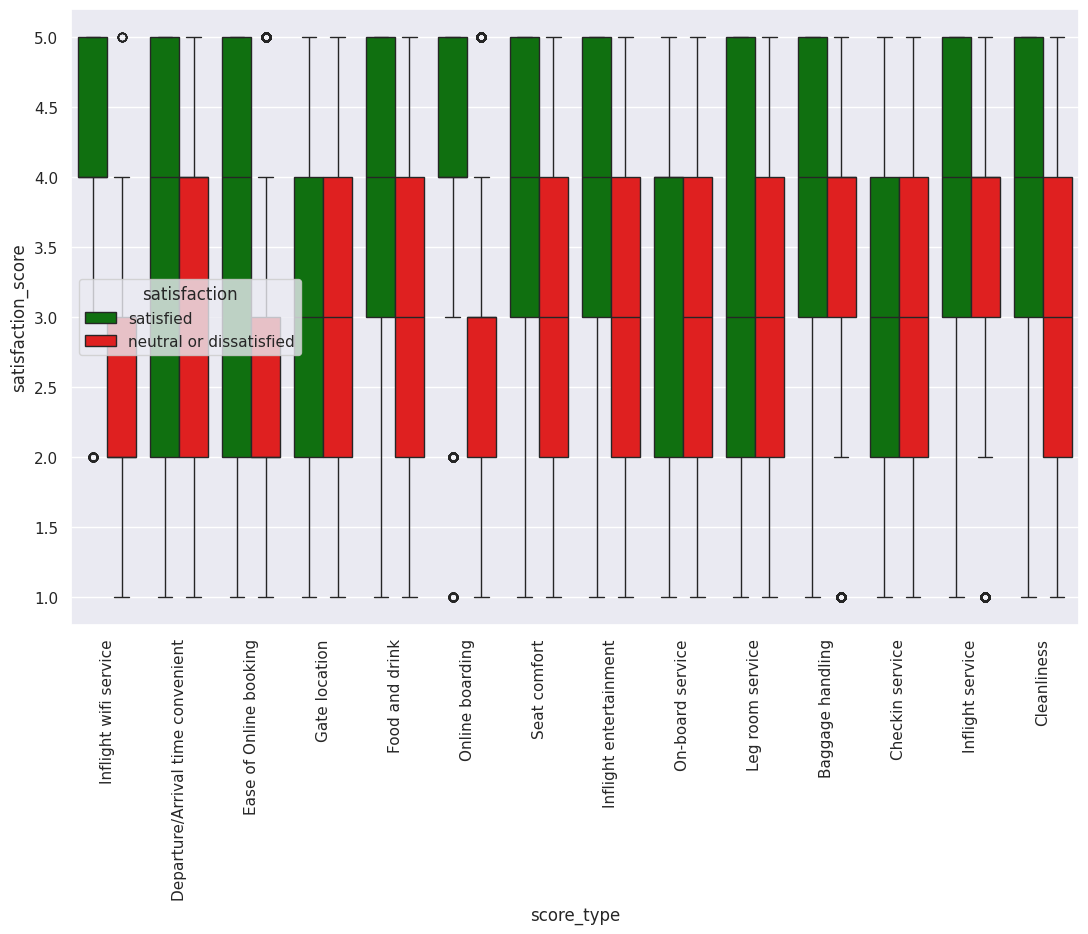

In [82]:
# Conduct a box plot in revealing the data, reveal that those 4 categories, indeed most of the related variables' 25 percentile and 75 percentile under 3.

air_clean_eco_box = air_clean_eco[air_clean_eco.loc[:,'Inflight wifi service':'Cleanliness'].columns.to_list()+['satisfaction']]

air_clean_eco_box_melted = air_clean_eco_box.melt(id_vars='satisfaction',
                    value_vars=air_clean_eco_box.columns.to_list()[:-1],
                    var_name='score_type',
                    value_name='satisfaction_score')

air_clean_eco_box_melted

sns.boxplot(air_clean_eco_box_melted, x='score_type', y='satisfaction_score', hue='satisfaction',palette=color_palette['satisfaction'])
plt.xticks(rotation=90)

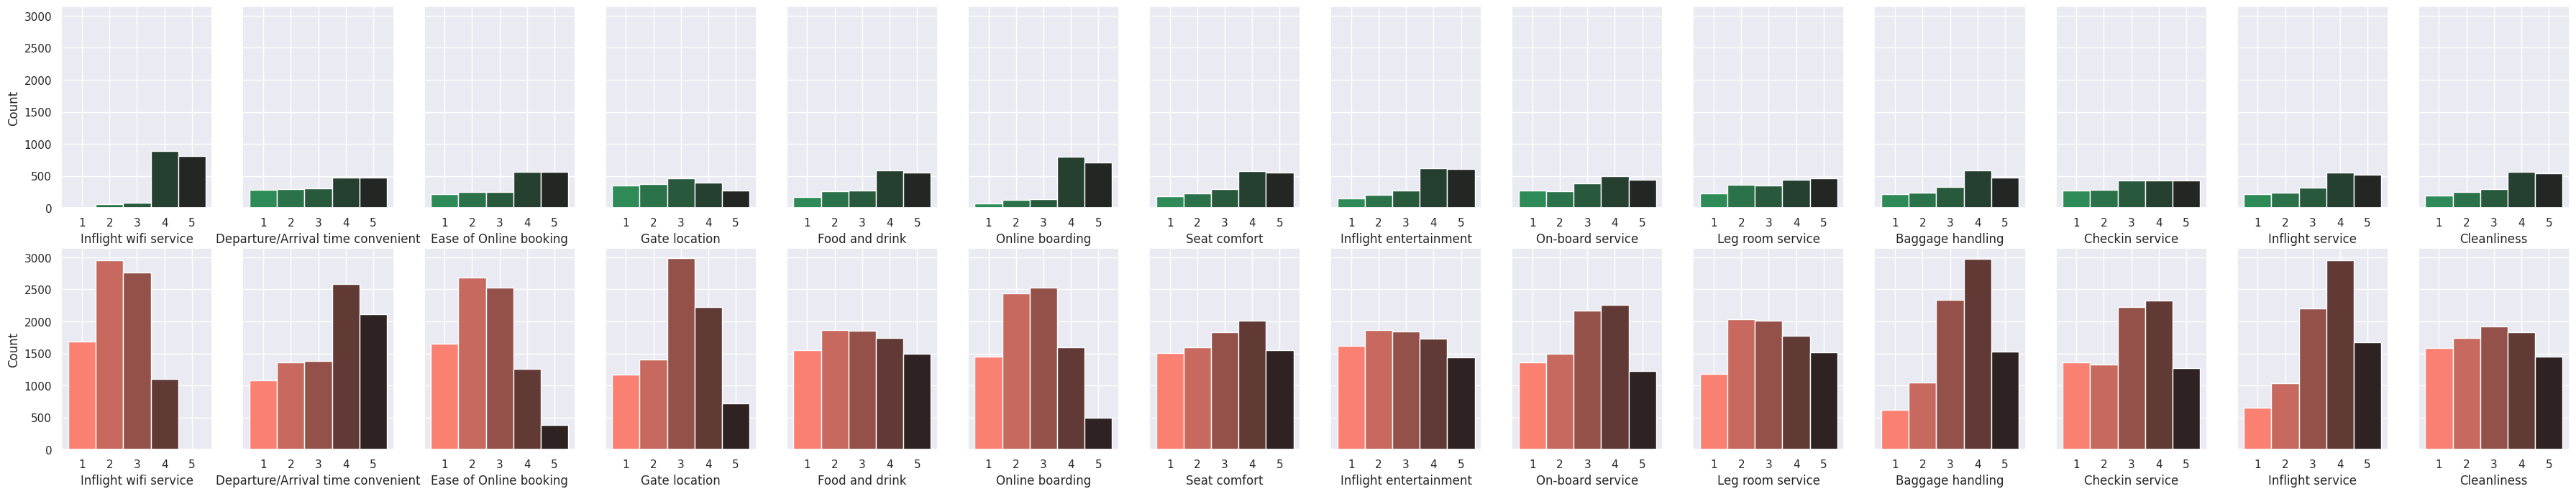

In [83]:
fig, ax = plt.subplots(2, 14, figsize=(45,8), sharey=True)
colors_satisfied = sns.color_palette("dark:seagreen_r", n_colors=5)
colors_dissatisfied = sns.color_palette("dark:salmon_r", n_colors=5)


for i, column in enumerate(air_clean_eco.loc[:,'Inflight wifi service':'Cleanliness'].columns):
    sns.histplot(air_clean_eco[air_clean_eco['satisfaction']=='satisfied'], x=column, bins=np.arange(0.5, 6.5, 1), kde=False, ax=ax[0,i])
    sns.histplot(air_clean_eco[air_clean_eco['satisfaction']!='satisfied'], x=column, bins=np.arange(0.5, 6.5, 1), kde=False, ax=ax[1,i])
    ax[0,i].set_xticks(ticks=range(1, 6), labels=range(1, 6))
    ax[1,i].set_xticks(ticks=range(1, 6), labels=range(1, 6))

    patches = ax[0,i].patches
    for j, patch in enumerate(patches):
        patch.set_facecolor(colors_satisfied[j])

    patches = ax[1,i].patches
    for k, patch in enumerate(patches):
        patch.set_facecolor(colors_dissatisfied[k])

## Multivariate Analysis

In [89]:
heatmap_col = ['satisfaction_binary','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

def heatmap(df,col):
  fig, ax = plt.subplots(figsize=(20,6))

  corr= pd.get_dummies(df)[col].corr()

  # Getting the Upper Triangle of the co-relation matrix
  matrix = np.triu(corr)

  # using the upper triangle matrix as mask
  sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix, cmap='Greens')

def satisfaction_score(data):
  data = data.copy()
  score = data['satisfaction'].apply(lambda x: 1 if x =='satisfied' else 0)
  return data.join(score, rsuffix='_binary')

Heatmap for Whole Eco Class

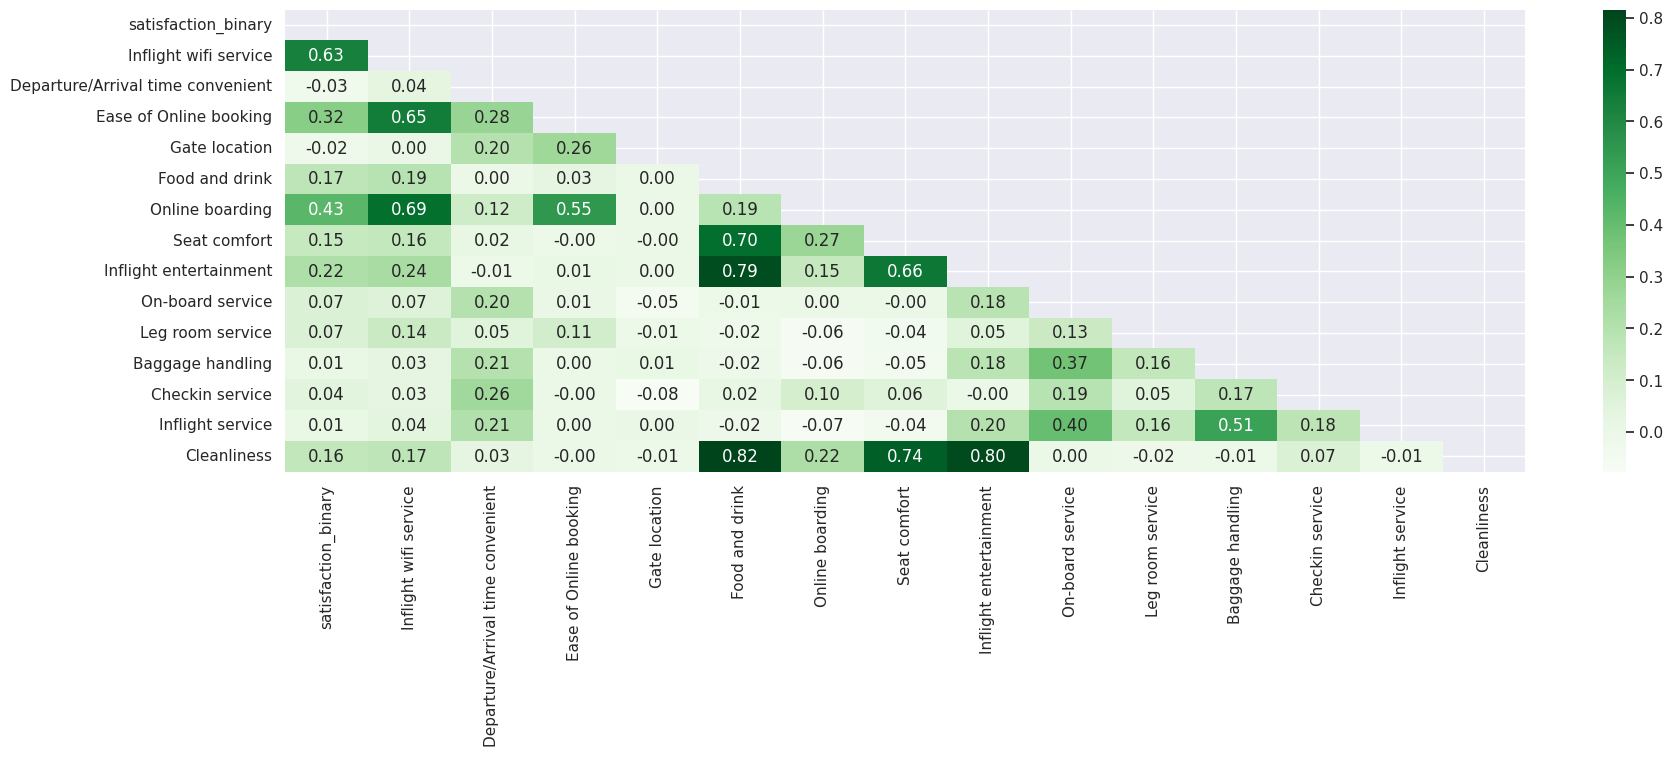

In [90]:
# Conduct a multivariate correlation analysis by using heat map.

# Correlation with Ease of Online booking 0.32
# Correlation with Inflight wifi service 0.63
# Correlation with Online boarding 0.43
# Correlation with Gate Location -0.02

# We discovered that Gate Location seems not the major reason with the overall satisfaction rating, but other 3 are.

heatmap(satisfaction_score(air_clean_eco), heatmap_col)

Heatmap for Eco Class with Peronal Travel

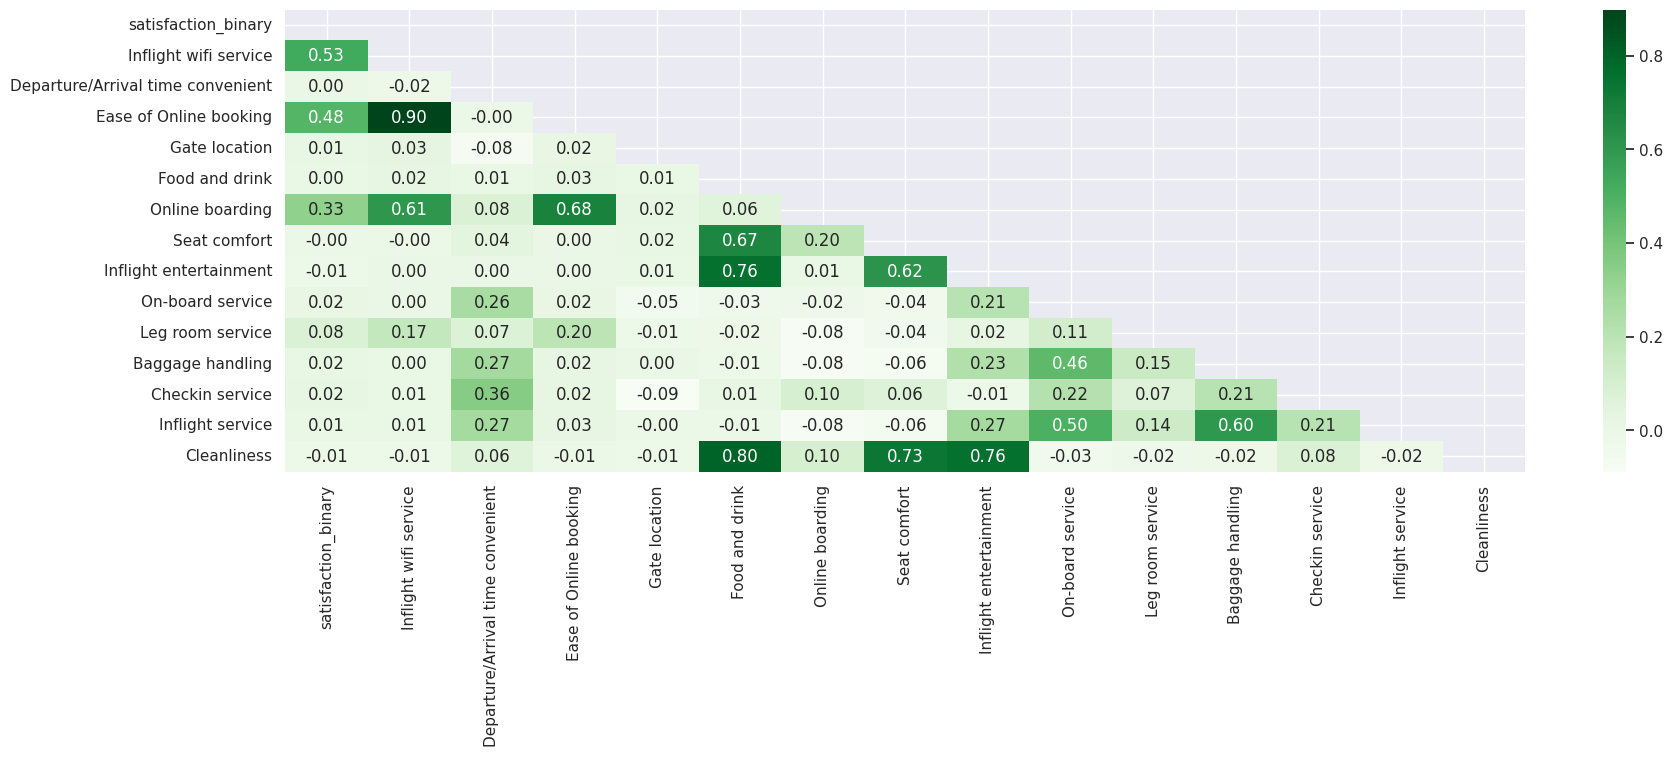

In [91]:
# Conduct a multivariate correlation analysis with Personal travellers by using heat map.

# Correlation with Ease of Online booking 0.48
# Correlation with Inflight wifi service 0.53
# Correlation with Online boarding 0.33
# Correlation with Gate Location 0.01


#  We discovered that Gate Location seems not the major reason with the overall satisfaction rating, but other 3 are.

air_clean_eco_personal = air_clean_eco[air_clean_eco['Type of Travel'] == 'Personal Travel']
heatmap(satisfaction_score(air_clean_eco_personal), heatmap_col)


#Eco class with Business Travel : 4402
#Eco class with Personal Travel : 5954

Heatmap for Eco Class with Business Travel

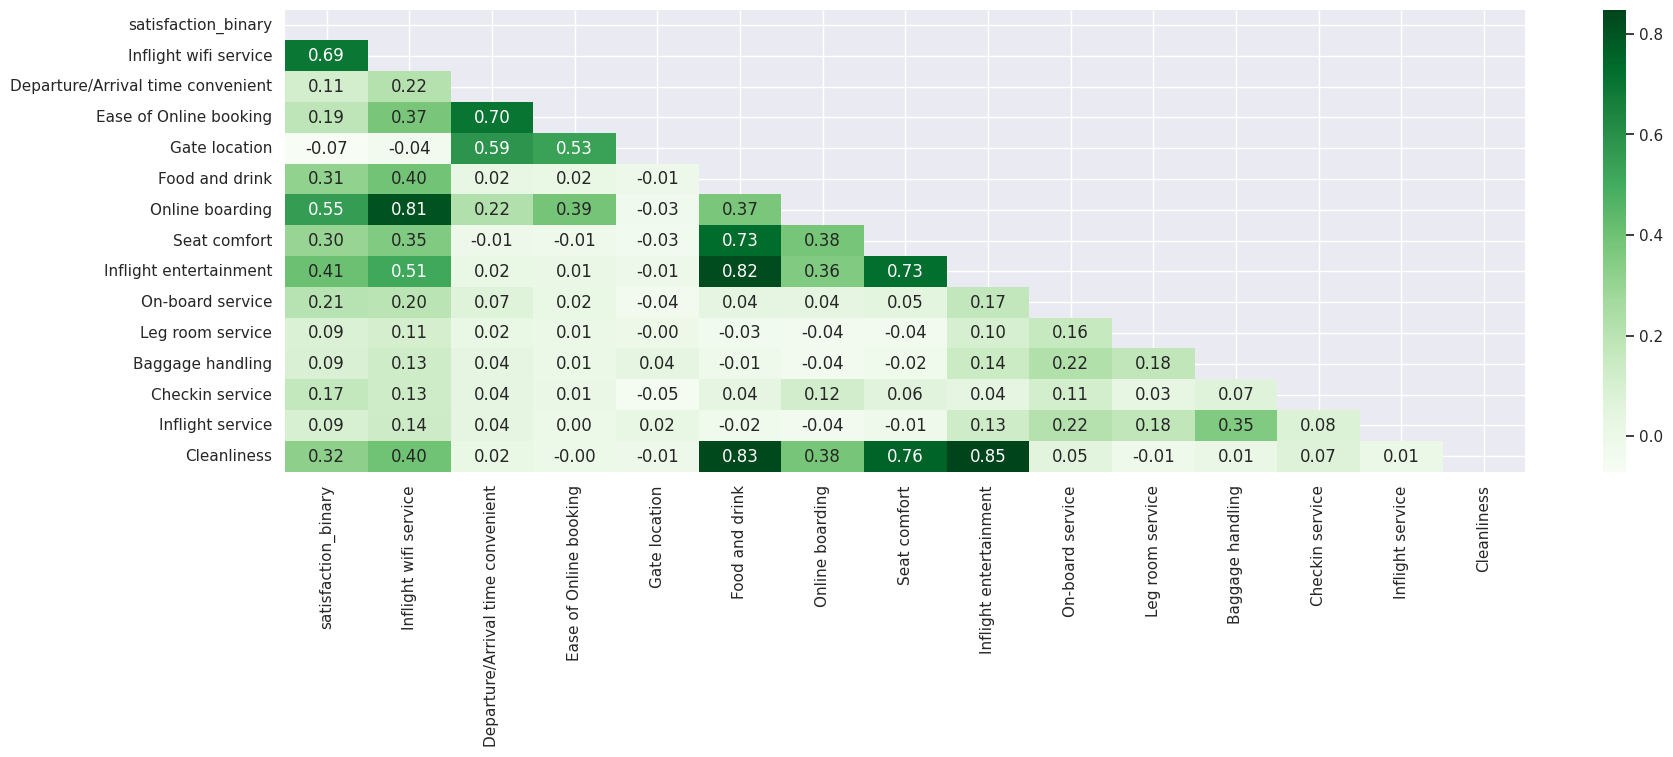

In [92]:
# Conduct a multivariate correlation analysis with Business travellers by using heat map.

# Correlation with Ease of Online booking 0.19
# Correlation with Inflight wifi service 0.69
# Correlation with Online boarding 0.55
# Correlation with Gate Location -0.07


# Different from personal travellers, business ravellers are not considered "Ease of online booking"as the major reason with the overall satisfaction rating,
# however, they trend to consider more on "Food and Drink", "Seat Confort", "Inflight entertainment", and "Cleanliness"
# Therefore, if we want to enhance overall satisfaction level of Eco class travellers, we can focus on different elements of service mentioned above.

air_clean_eco_business = air_clean_eco[air_clean_eco['Type of Travel'] == 'Business travel']
heatmap(satisfaction_score(air_clean_eco_business), heatmap_col)


#Eco class with Business Travel : 4402
#Eco class with Personal Travel : 5954